# **SET UP**

https://www.ncbi.nlm.nih.gov/books/NBK179288/

## **Install**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/BIOINFORMATICS_LECTURE/SD4108/PERTEMUAN/COLAB_version')

In [ ]:
! pip install Biopython
! sudo apt-get install -y clustalw
#! chmod +x clustalw2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 23.0 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  clustalx seaview
The following NEW packages will be installed:
  clustalw
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 275 kB of archives.
After this operation, 818 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 clustalw amd64 2.1+lgpl-7 [275 kB]
Fetched 275 kB in 1s (438 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-ope

## **Import**

In [ ]:
from Bio import Entrez, SeqIO
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.Align.Applications import ClustalwCommandline
import os

/usr/local/lib/python3.10/dist-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


# **Week 5. FETCH FASTA SEQUENCE FROM PUBLIC DATABASE (NCBI, GENBANK, GISAID)**

## **0A. Fetching a sequence (ID) from GenBank/NCBI using biopython**

In [ ]:
from Bio import Entrez, SeqIO

# input email sebagai identitas
Entrez.email = "your-email@example.com"

# Fetch sekuen dengan menggunakan ACCESSION NUMBER ID GENBANK
def fetch_sequence_from_genbank(accession_id):
    handle = Entrez.efetch(db="nucleotide", id=accession_id, rettype="gb", retmode="text")
    record = SeqIO.read(handle, "genbank")
    handle.close()

    # Print the sequence
    print(f"Description: {record.description}")
    print(f"Sequence: {record.seq}")
    #print(f"Sequence: {record.annotations}")

    return record

# Example usage
genbank_record = fetch_sequence_from_genbank("AB425198.1")  # Example: esophageal cancer protein 1 genome

Description: Homo sapiens DLEC1 mRNA for deleted in lung and esophageal cancer protein 1, partial cds
Sequence: CCAGGAGCTCCAAAACGCGGAGGTCTTTAGCGTCCCGGACCAACGAGTGCCAGGGGACAATGTGGGCGCCAACTTCGCCACCAGCCGGGTCCAGCAGCCCCAGCCAGCCCACCTGGAAGTCCTCCTTGTATTCCTCCCTCGCCTACTCTGAGGCCTTCCACTACAGCTTCGCAGCCCGGCCCCGCCGCCTCACGCAGCTTGCGCTGGCGCAGCGTCCCGAGCCTCAGCTGCTTCGTCTGCGCCCCTCCTCGCTGCGCACCCAAGATATCTCGCACTTGCTCACCGGCGTCTTCCGCAACTTGTACTCAGCCGAGGTCATCGGCGACGAAGTGAGCGCAAGCTTGATCAAGGCCCGCGGCAGCGAGAATGAGCGCCACGAGGAGTTCGTGGACCAGCTGCAGCAGATTCGGGAGCTCTATAAGCAGCGGCTGGATGAGTTTGAAATGTTGGAGAGACATATCACTCAGGCCCAAGCACGGGCTATTGCGGAAAATGAGCGGGTCATGAGCCAGGCTGGAGTACAGGACCTCGAGAGCCTTGTCAGGTTGCCTCCAGTGAAGAGTGTCTCCAGATGGTGTATAGACAGCGAGTTGCTACGGAAACATCATTTGATCTCCCCAGAAGATTACTACACCGATACAGTGCCGTTTCACTCTGCACCTAAAGGCATCTCCCTACCTGGATGTTCAAAACTGACATTTAGCTGTGAGAAGCGTTCCGTCCAGAAGAAAGAGCTGAACAAGAAGCTTGAAGATTCATGCAGGAAGAAGCTTGCTGAGTTCGAAGATGAGTTAGACCACACTGTGGACAGCCTGACATGGAATTTAACTCCTAAGGCCAAAGAAAGGACCAGAGAACCTCTCAAGAAAGCAAGTCAACCAAGGAATA

### check hieracycal data structure

In [ ]:
# annotations field; dic that provides a number of properties for the seq
print('Annotations dictionary:\n')
print(genbank_record.annotations)

print('\nKeys:')
print(genbank_record.annotations.keys())

Annotations dictionary:

{'molecule_type': 'mRNA', 'topology': 'linear', 'data_file_division': 'PRI', 'date': '26-JUL-2016', 'accessions': ['AB425198'], 'sequence_version': 1, 'keywords': [''], 'source': 'Homo sapiens (human)', 'organism': 'Homo sapiens', 'taxonomy': ['Eukaryota', 'Metazoa', 'Chordata', 'Craniata', 'Vertebrata', 'Euteleostomi', 'Mammalia', 'Eutheria', 'Euarchontoglires', 'Primates', 'Haplorrhini', 'Catarrhini', 'Hominidae', 'Homo'], 'references': [Reference(title='Homo sapiens mRNA for large protein', ...), Reference(title='Direct Submission', ...)]}

Keys:
dict_keys(['molecule_type', 'topology', 'data_file_division', 'date', 'accessions', 'sequence_version', 'keywords', 'source', 'organism', 'taxonomy', 'references'])


In [ ]:
# Getting specific key values
gb=genbank_record
print('\nGet specific parts of the annotation:\n')
print('Taxonomy:\n')
print(gb.annotations['taxonomy'])

print('Source:\n')
print(gb.annotations['source'])

print('Date:\n')
print(gb.annotations['date'])

#print('gi number:\n')
#print(gb.annotations['gi'])


Get specific parts of the annotation:

Taxonomy:

['Eukaryota', 'Metazoa', 'Chordata', 'Craniata', 'Vertebrata', 'Euteleostomi', 'Mammalia', 'Eutheria', 'Euarchontoglires', 'Primates', 'Haplorrhini', 'Catarrhini', 'Hominidae', 'Homo']
Source:

Homo sapiens (human)
Date:

26-JUL-2016


In [ ]:
gb.features[:5] # show only a few features (total=41)

[SeqFeature(SimpleLocation(ExactPosition(0), ExactPosition(5592), strand=1), type='source', qualifiers=...),
 SeqFeature(SimpleLocation(BeforePosition(0), ExactPosition(5592), strand=1), type='gene', qualifiers=...),
 SeqFeature(SimpleLocation(BeforePosition(0), ExactPosition(5270), strand=1), type='CDS', qualifiers=...)]

In [ ]:
gene_features = []
for i in range(len(gb.features)):
    if(gb.features[i].type == 'gene'):
        gene_features.append(gb.features[i])

print(f'Number of gene features: {len(gene_features)}')
gene_features

Number of gene features: 1


[SeqFeature(SimpleLocation(BeforePosition(0), ExactPosition(5592), strand=1), type='gene', qualifiers=...)]

In [ ]:
# Gene Qualifiers
gene_features[0].qualifiers

{'gene': ['DLEC1']}

In [ ]:
CDS_features = []
for i in range(len(gb.features)):
    if(gb.features[i].type == 'CDS'):
        CDS_features.append(gb.features[i])

print(f"Number of CDS features: {len(CDS_features)}")
CDS_features

Number of CDS features: 1


[SeqFeature(SimpleLocation(BeforePosition(0), ExactPosition(5270), strand=1), type='CDS', qualifiers=...)]

In [ ]:
print(f'CDS Qualifier Keys: {CDS_features[0].qualifiers.keys()}\n')

print('Showing First CDS Feature')
print(CDS_features[0].qualifiers) # ordered dictionary

CDS Qualifier Keys: dict_keys(['gene', 'codon_start', 'product', 'protein_id', 'translation'])

Showing First CDS Feature
{'gene': ['DLEC1'], 'codon_start': ['3'], 'product': ['deleted in lung and esophageal cancer protein 1'], 'protein_id': ['BAG11659.1'], 'translation': ['RSSKTRRSLASRTNECQGTMWAPTSPPAGSSSPSQPTWKSSLYSSLAYSEAFHYSFAARPRRLTQLALAQRPEPQLLRLRPSSLRTQDISHLLTGVFRNLYSAEVIGDEVSASLIKARGSENERHEEFVDQLQQIRELYKQRLDEFEMLERHITQAQARAIAENERVMSQAGVQDLESLVRLPPVKSVSRWCIDSELLRKHHLISPEDYYTDTVPFHSAPKGISLPGCSKLTFSCEKRSVQKKELNKKLEDSCRKKLAEFEDELDHTVDSLTWNLTPKAKERTREPLKKASQPRNKNWMNHLRVPQRELDRLLLARMESRNHFLKNPRFFPPNTRYGGKSLVFPPKKPAPIGEFQSTEPEQSCADTPVFLAKPPIGFFTDYEIGPVYEMVIALQNTTTTSRYLRVLPPSTPYFALGLGMFPGKGGMVAPGMTCQYIVQFFPDCLGDFDDFILVETQSAHTLLIPLQARRPPPVLTLSPVLDCGYCLIGGVKMTRFICKNVGFSVGRFCIMPKTSWPPLSFKAIATVGFVEQPPFGILPSVFELAPGHAILVEVLFSPKSLGKAEQTFIIMCDNCQIKELVTIGIGQLIALDLIYISGEKSQPDPGELTDLTAQHFIRFEPENLRSTARKQLIIRNATHVELAFYWQIMKPNLQPLMPGETFSMDSIKCYPDKETAFSIMPRKGVLSPHTDHEFILSFSPHELRDFHSVLQMVLEEVPEPVSSEAE

In [ ]:
for key, value in CDS_features[0].qualifiers.items():
    print(f'{key} : {value}')

gene : ['DLEC1']
codon_start : ['3']
product : ['deleted in lung and esophageal cancer protein 1']
protein_id : ['BAG11659.1']
translation : ['RSSKTRRSLASRTNECQGTMWAPTSPPAGSSSPSQPTWKSSLYSSLAYSEAFHYSFAARPRRLTQLALAQRPEPQLLRLRPSSLRTQDISHLLTGVFRNLYSAEVIGDEVSASLIKARGSENERHEEFVDQLQQIRELYKQRLDEFEMLERHITQAQARAIAENERVMSQAGVQDLESLVRLPPVKSVSRWCIDSELLRKHHLISPEDYYTDTVPFHSAPKGISLPGCSKLTFSCEKRSVQKKELNKKLEDSCRKKLAEFEDELDHTVDSLTWNLTPKAKERTREPLKKASQPRNKNWMNHLRVPQRELDRLLLARMESRNHFLKNPRFFPPNTRYGGKSLVFPPKKPAPIGEFQSTEPEQSCADTPVFLAKPPIGFFTDYEIGPVYEMVIALQNTTTTSRYLRVLPPSTPYFALGLGMFPGKGGMVAPGMTCQYIVQFFPDCLGDFDDFILVETQSAHTLLIPLQARRPPPVLTLSPVLDCGYCLIGGVKMTRFICKNVGFSVGRFCIMPKTSWPPLSFKAIATVGFVEQPPFGILPSVFELAPGHAILVEVLFSPKSLGKAEQTFIIMCDNCQIKELVTIGIGQLIALDLIYISGEKSQPDPGELTDLTAQHFIRFEPENLRSTARKQLIIRNATHVELAFYWQIMKPNLQPLMPGETFSMDSIKCYPDKETAFSIMPRKGVLSPHTDHEFILSFSPHELRDFHSVLQMVLEEVPEPVSSEAESLGHSSYSVDDVIVLEIEVKGSVEPFQVLLEPYALIIPGENYIGINVKKAFKMWNNSKSPIRYLWGKISDCHIIEVEPGTGVIEPSEVGDFELNFTGGVPGPTSQDLLCEIEDSPSPVVLHIEAVFKGPALI

## **0B. Fetching Multiple sequences by query from NCBI**

In [ ]:
from Bio import Entrez, SeqIO

Entrez.email = "your-email@example.com"

# Function to fetch multiple sequences from GenBank based on a search query
def fetch_multiple_sequences(query, max_records):

    # Search for nucleotide sequences matching the query
    search_handle = Entrez.esearch(db="nucleotide", term=query, retmax=max_records)
    search_results = Entrez.read(search_handle)
    search_handle.close()

    ids = search_results["IdList"]

    # Fetch the sequences in FASTA format
    fetch_handle = Entrez.efetch(db="nucleotide", id=ids, rettype="fasta", retmode="text")
    sequences = list(SeqIO.parse(fetch_handle, "fasta"))
    fetch_handle.close()

    # Print the total number of sequences fetched
    print(f"Fetched {len(sequences)} sequences")

    # Optionally save to a file
    with open("sequences.fasta", "w") as output_handle:
        SeqIO.write(sequences, output_handle, "fasta")

    return sequences

# Example usage: Search for BRCA1 gene in Homo sapiens
sequences = fetch_multiple_sequences("BRCA1[Gene] AND Homo sapiens[Organism]", max_records=50)

Fetched 50 sequences


## **0C. Reading sequences from local FASTA file**

In [ ]:
from Bio import SeqIO

# Function to read sequences from a FASTA file
def read_fasta(file_path):
    sequences = list(SeqIO.parse(file_path, "fasta"))
    print(f"Found {len(sequences)} sequences in {file_path}")

    for seq_record in sequences[:5]:  # Print the first 5 sequences
        print(f"ID: {seq_record.id}")
        print(f"Sequence: {seq_record.seq[:100]}...")  # Print the first 100 bases

    return sequences

# Example usage
fasta_sequences = read_fasta("sequences.fasta")

Found 50 sequences in sequences.fasta
ID: NG_005905.2
Sequence: TGTGTGTATGAAGTTAACTTCAAAGCAAGCTTCCTGTGCTGAGGGGGTGGGAGGTAAGGGTGTGATGAGGCAGGGCTTCTCCTTTGGCAAAGCCTCTGTA...
ID: NC_060941.1
Sequence: CCTAACCCTAACCCATAACCCTAACCCTAACCTACCCTAACCCTAACCCTAACCCTAACCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAAC...
ID: NC_000017.11
Sequence: NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
ID: PP465840.1
Sequence: ATGGATTTATCTGCTCTTCGCGTTGAAGAAGTACAAAATGTCATTAATGCTATGCAGAAAATCTTAGAGTGTCCCATCTGTCTGGAGTTGATCAAGGAAC...
ID: PP465839.1
Sequence: ATGGATTTATCTGCTCTTCGCGTTGAAGAAGTACAAAATGTCATTAATGCTATGCAGAAAATCTTAGAGTGTCCCATCTGTCTGGAGTTGATCAAGGAAC...


## **0D. Akses NCBI Virus Data Hub**

In [ ]:
def fetch_viral_sequences(query, max_records):
    Entrez.email = "your-email@example.com"

    # Search for viral sequences
    search_handle = Entrez.esearch(db="nucleotide", term=query, retmax=max_records)
    search_results = Entrez.read(search_handle)
    search_handle.close()

    ids = search_results["IdList"]

    # Fetch the sequences in FASTA format
    fetch_handle = Entrez.efetch(db="nucleotide", id=ids, rettype="fasta", retmode="text")
    sequences = list(SeqIO.parse(fetch_handle, "fasta"))
    fetch_handle.close()

    # Save to a file
    with open("viral_sequences.fasta", "w") as output_handle:
        SeqIO.write(sequences, output_handle, "fasta")

    return sequences

# Example usage: Fetching SARS-CoV-2 sequences
viral_sequences = fetch_viral_sequences("SARS-CoV-2[Organism]", max_records=100)

## **0E. Downloading Data in Bulk with Biophyton**

In [ ]:
# Download a large number of records (e.g., 1000 sequences) in batches of 200
def batch_download_sequences(query, batch_size=200, total_records=1000):
    Entrez.email = "your-email@example.com"

    for start in range(0, total_records, batch_size):
        handle = Entrez.esearch(db="nucleotide", term=query, retstart=start, retmax=batch_size)
        record = Entrez.read(handle)
        ids = record["IdList"]

        # Fetch sequences
        handle = Entrez.efetch(db="nucleotide", id=ids, rettype="fasta", retmode="text")
        data = handle.read()
        handle.close()

        with open(f"sequences_batch_{start}.fasta", "w") as f:
            f.write(data)

        print(f"Downloaded {len(ids)} records (Batch {start // batch_size + 1})")

# Example: Downloading large viral dataset
batch_download_sequences("SARS-CoV-2[Organism]", batch_size=200, total_records=1000)

Downloaded 200 records (Batch 1)
Downloaded 200 records (Batch 2)
Downloaded 200 records (Batch 3)
Downloaded 200 records (Batch 4)
Downloaded 200 records (Batch 5)


## **0F. Downloading Data in Bulk with Biophyton using reference file (.txt)**

In [ ]:
def download_cytochrome_b_sequences(species_list):
    Entrez.email='researchtirta@gmail.com'

    for species in species_list:
        search_term = f"{species} AND mitochondrial cytochrome b gene, complete cds AND 1:2000[SLEN]"
        handle = Entrez.esearch(db='nucleotide', term=search_term, retmax=5)
        record = Entrez.read(handle)
        handle.close()

        if int(record['Count'] == 0):
            print(f"No cytochrome b sequences found for {species}")
        else:
            seq_ids = record['IdList']
            handle = Entrez.efetch(db='nucleotide', id=seq_ids, rettype='fasta', retmode='text')
            sequences = SeqIO.parse(handle,'fasta')
            sequence_list = list(sequences)

            output_file = f"{species}_cytb.fasta"
            SeqIO.write(sequence_list, output_file, 'fasta')
            handle.close()
            num_sequences = len(sequence_list)
            print(f"Downloaded {num_sequences} cytochrome b sequence(s) for {species}")

In [ ]:
file_path = 'species_file.txt'

with open(file_path, 'r') as file:
    species_list = [line.strip() for line in file]

download_cytochrome_b_sequences(species_list)

Downloaded 1 cytochrome b sequence(s) for Carcharodon carcharias
Downloaded 2 cytochrome b sequence(s) for Galeocerdo cuvier
Downloaded 0 cytochrome b sequence(s) for Sphyrnidae family
Downloaded 1 cytochrome b sequence(s) for Sphyrna lewini
Downloaded 0 cytochrome b sequence(s) for Sphyrna mokarran
Downloaded 0 cytochrome b sequence(s) for Carcharhinus leucas
Downloaded 0 cytochrome b sequence(s) for Rhincodon typus
Downloaded 5 cytochrome b sequence(s) for Prionace glauca
Downloaded 0 cytochrome b sequence(s) for Isurus genus
Downloaded 1 cytochrome b sequence(s) for Isurus oxyrinchus
Downloaded 1 cytochrome b sequence(s) for Isurus paucus
Downloaded 0 cytochrome b sequence(s) for Carcharias taurus
Downloaded 0 cytochrome b sequence(s) for Cetorhinus maximus
Downloaded 2 cytochrome b sequence(s) for Mitsukurina owstoni
Downloaded 0 cytochrome b sequence(s) for Alopias genus
Downloaded 0 cytochrome b sequence(s) for Alopias vulpinus
Downloaded 0 cytochrome b sequence(s) for Alopias su

## **0G. Combine or merge multiple fasta file**

In [ ]:
from Bio import SeqIO

# List of input FASTA files you want to combine
fasta_files = ["sequences_batch_0.fasta", "sequences_batch_200.fasta",
               "sequences_batch_400.fasta", "sequences_batch_600.fasta",
               "sequences_batch_800.fasta"]

# Name of the output file
output_file = "combined_sequences.fasta"

# Open the output file for writing
with open(output_file, "w") as outfile:
    for fasta_file in fasta_files:
        # Parse each input FASTA file
        with open(fasta_file, "r") as infile:
            # Use SeqIO.parse to read sequences and write them to the output file
            for record in SeqIO.parse(infile, "fasta"):
                SeqIO.write(record, outfile, "fasta")

print(f"Sequences from {len(fasta_files)} files have been combined into {output_file}")

Sequences from 5 files have been combined into combined_sequences.fasta


## **LATIHAN**

### Latihan 1

1. Silahkan buat analisis sekuen dengan ID: NC_045512:

    a. Temukan Key dan Value dari ID tersebut

    b. Jelaskan informasi terkait sekuen dengan ID tersebut

2. Downloadlah dataset variant dari covid-19 informasi ada disini https://en.wikipedia.org/wiki/Variants_of_SARS-CoV-2:

    a. Downloadlah menggunakan file referensi dengan format .txt

    b. Gunakan fungsi untuk melakukan merger file dengan format **(fasta dan ganbank)**

    c. contoh file yang dikumpulkan sbb: link

3. Tugas dikumpulkan dalam format .ipynb pada GCR sebelum 30 September 2024

### Latihan 2

**TUGAS INDIVIDU**
1. Wuhan-Hu1 adalah sampel origin complete genome yang pertama di isolasi dengan kode akses NC_045512, dowload data tersebut dengan format fasta!.
2. Berikut adalah link informasi varian covid: https://en.wikipedia.org/wiki/Variants_of_SARS-CoV-2, kumpulkan semua dataset untuk setiap varian dengan format fasta!
3. Lakukan EDA sederhana untuk:

    a. metadata analisis

    b. analisis composisi nukleotida

    c. identifikasi mutasi dengan referensi
    
    d. phylogenetic

**TUGAS KELOMPOK**
1. Terdapat 8 kelompok dengan anggota maksimal 8
2.
    0	crystallizationMethod
    1	crystallizationTempK
    2	phValue
    3	pdbxDetails
    4	densityMatthews
    5	densityPercentSol
    6	publicationYear
    7	macromoleculeType
    8	resolution
    9	sequence
    10	chainId
    11	classification
    12	structureId
    13	experimentalTechnique
    14	structureMolecularWeight
    15	residueCount

# **Week 6. MAKE DATASET**

## Topik Malaria Error System "NUCCORE"

In [ ]:
from Bio import Entrez, SeqIO
import pandas as pd

# Set up Entrez email (required by NCBI)
Entrez.email = "setiawan@gmail.com"  # Replace with your email

# Function to fetch GenBank data by search term (e.g., "Plasmodium malariae")
def fetch_genbank_data(search_term, max_records=10):
    # Search the NCBI nucleotide database
    handle = Entrez.esearch(db="nucleotide", term=search_term, retmax=max_records)
    record = Entrez.read(handle)
    handle.close()

    # Get the list of GenBank IDs
    genbank_ids = record["IdList"]

    # Fetch GenBank data for each ID
    sequences = []
    for genbank_id in genbank_ids:
        handle = Entrez.efetch(db="nucleotide", id=genbank_id, rettype="gb", retmode="text")
        seq_record = SeqIO.read(handle, "genbank")
        sequences.append(seq_record)
        handle.close()

    return sequences

# Function to convert SeqRecord objects to a DataFrame
def genbank_to_dataframe(seq_records):
    data = []
    for seq_record in seq_records:
        data.append({
            "Accession": seq_record.id,
            "Name": seq_record.name,
            "Description": seq_record.description,
            "Organism": seq_record.annotations.get("organism", "Unknown"),
            "Sequence Length": len(seq_record.seq),
            "Sequence": str(seq_record.seq)
        })
    return pd.DataFrame(data)

# Example usage
# search_term = "Plasmodium vivax[Organism] OR plasmodium vivax[All Fields]"
search_term = "insulin [PROT] AND rodents [ORGN]"
sequences = fetch_genbank_data(search_term, max_records=10)  # Fetch 5 records
df = genbank_to_dataframe(sequences)

# Display the DataFrame
print(df)

RuntimeError: Search Backend failed: Database is not supported: nuccore

## **Topik Malaria (Plasmodium Vivax)**

In [ ]:
from Bio import SeqIO
import pandas as pd
from datetime import datetime

### **Explore single genbank file structure**

**1. Read Genbank file**

In [ ]:
file_path = "plasmodium-vivax-1-record.gb"

In [ ]:
with open(file_path, "r") as handle:
        seq_record = SeqIO.read(handle, "genbank")

**2. Data Structure**

In [ ]:
# annotations field; dic that provides a number of properties for the seq
print('Annotations dictionary:\n')
print(seq_record.annotations)

print('\nKeys:')
print(seq_record.annotations.keys())

Annotations dictionary:

{'molecule_type': 'DNA', 'topology': 'linear', 'data_file_division': 'INV', 'date': '31-JAN-1995', 'accessions': ['L23073'], 'sequence_version': 1, 'keywords': ['Duffy receptor', 'erythrocyte-binding protein', 'microneme protein-1'], 'source': 'Plasmodium vivax (malaria parasite P. vivax)', 'organism': 'Plasmodium vivax', 'taxonomy': ['Eukaryota', 'Sar', 'Alveolata', 'Apicomplexa', 'Aconoidasida', 'Haemosporida', 'Plasmodiidae', 'Plasmodium', 'Plasmodium (Plasmodium)'], 'references': [Reference(title='Isolation of three distinct parasite populations expressing different circumsporozoite proteins from the Philippine strain of Plasmodium knowlesi', ...), Reference(title='The Duffy receptor family of Plasmodium knowlesi is located within the micronemes of invasive malaria merozoites', ...), Reference(title='Cloning of the Plasmodium vivax Duffy receptor', ...), Reference(title='A family of erythrocyte binding proteins of malaria parasites', ...), Reference(title='

**3. Get Value**

In [ ]:
# Getting specific key values
print('\nGet specific parts of the annotation:\n')
print('Taxonomy:')
print(seq_record.annotations['taxonomy'])

print('\nSource:')
print(seq_record.annotations['source'])

print('\nDate:')
print(seq_record.annotations['date'])

print('\nDate:')
print(seq_record.annotations['references'])

print('\nOriginal:')
print(seq_record.annotations['comment'])


Get specific parts of the annotation:

Taxonomy:
['Eukaryota', 'Sar', 'Alveolata', 'Apicomplexa', 'Aconoidasida', 'Haemosporida', 'Plasmodiidae', 'Plasmodium', 'Plasmodium (Plasmodium)']

Source:
Plasmodium vivax (malaria parasite P. vivax)

Date:
31-JAN-1995

Date:
[Reference(title='Isolation of three distinct parasite populations expressing different circumsporozoite proteins from the Philippine strain of Plasmodium knowlesi', ...), Reference(title='The Duffy receptor family of Plasmodium knowlesi is located within the micronemes of invasive malaria merozoites', ...), Reference(title='Cloning of the Plasmodium vivax Duffy receptor', ...), Reference(title='A family of erythrocyte binding proteins of malaria parasites', ...), Reference(title='Polymorphisms of the Plasmodium vivax microneme protein-1', ...), Reference(title='Natural variation within the principal adhesion domain of the Plasmodium vivax duffy binding protein', ...)]

Original:
Original source text: Plasmodium vivax (ind

**3.1 Extract Year**

In [ ]:
if "date" in seq_record.annotations:
    date_str = seq_record.annotations["date"]
    try:
        submission_year = datetime.strptime(date_str, "%d-%b-%Y").year
    except ValueError:
        submission_year = "Unknown"  # If date parsing fails
else:
    submission_year = "Unknown"
submission_year

1995

**4. Get feature**

In [ ]:
seq_record.features[:5]

[SeqFeature(SimpleLocation(ExactPosition(0), ExactPosition(2272), strand=1), type='source', qualifiers=...),
 SeqFeature(SimpleLocation(BeforePosition(0), AfterPosition(2272), strand=1), type='CDS', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(1296), ExactPosition(1372), strand=1), type='misc_feature', qualifiers=...)]

**5. Feature Gen**

In [ ]:
gene_features = []
for i in range(len(seq_record.features)):
    if(seq_record.features[i].type == 'gene'):
        gene_features.append(seq_record.features[i])

print(f'Number of gene features: {len(gene_features)}')
gene_features

Number of gene features: 0


[]

In [ ]:
# Gene Qualifiers
gene_features[0].qualifiers

IndexError: list index out of range

**6. Feature CDS (Coding Sequence)**

In [ ]:
CDS_features = []
for i in range(len(seq_record.features)):
    if(seq_record.features[i].type == 'CDS'):
        CDS_features.append(seq_record.features[i])

print(f"Number of CDS features: {len(CDS_features)}")
CDS_features

Number of CDS features: 1


[SeqFeature(SimpleLocation(BeforePosition(0), AfterPosition(2272), strand=1), type='CDS', qualifiers=...)]

**7. Choose CDS and Explore The Feature**

In [ ]:
print(f'CDS Qualifier Keys: {CDS_features[0].qualifiers.keys()}\n')

print('Showing First CDS Feature')
print(CDS_features[0].qualifiers) # ordered dictionary

CDS Qualifier Keys: dict_keys(['function', 'experiment', 'codon_start', 'product', 'protein_id', 'translation'])

Showing First CDS Feature
{'function': ['erythrocyte binding domain'], 'experiment': ['experimental evidence, no additional details recorded'], 'codon_start': ['1'], 'product': ['microneme protein-1'], 'protein_id': ['AAA61770.1'], 'translation': ['RYQLCMKELTNFVNNTDTNFHRDITFRKLYLKWKLIYDAAVEFDLLLKLNNYRYNKVFCKDIRRSLGDFGDIIMGTDMEGIGYSEVVENNLRSFGTGEKAQQHRKQWWNESKAQIWTAMMYSVKKRLKGNFIWICKINVAVNIEPQIYRRIREWGRDYVSELPTEVQKLKEKCDGKINYTDKKVCKVPPCQNACKSYDQWITRKKNQWDVLSNKFKSVKNAEKVQTAGIVTPYDILKQELDEFNEVAFENEINKRDGAYIELCVCSVEEAKKNTQEVVTNVDNAAKSQATNSNPISQPVDSSKAEKVPGDSAHGNVNSGQDSSTTGKAVTGDGQNGNQTPAESDVQRSDIAESVSAKNVDPQKSVSKRSDDTASVTGIAEAGKENLGASNSRPSESTVEANSPGDDTVNSASIPVVRGENPLVTPYNGLGHSKDNSDGTAEFAESTKSAESMANPDSNSKGETGKGQDNDMAKATKDSSNSSDGTSSATGDTTDAVDREINKGVPEDRDKTVGSKDGGGEDNSANKDAATVVGEDRIRENSAGGGTNDRSKNDTEKNGASTPDSKQSEDATALSKTESLESTESGDRTTNDTTNSLENKNGGKEKDLQKHDFKSNDTPNEEPNSDQTTDAEGHDRDS

**8. Enumerate The Structure**

In [ ]:
for key, value in CDS_features[0].qualifiers.items():
    print(f'{key} : {value}')

function : ['erythrocyte binding domain']
experiment : ['experimental evidence, no additional details recorded']
codon_start : ['1']
product : ['microneme protein-1']
protein_id : ['AAA61770.1']
translation : ['RYQLCMKELTNFVNNTDTNFHRDITFRKLYLKWKLIYDAAVEFDLLLKLNNYRYNKVFCKDIRRSLGDFGDIIMGTDMEGIGYSEVVENNLRSFGTGEKAQQHRKQWWNESKAQIWTAMMYSVKKRLKGNFIWICKINVAVNIEPQIYRRIREWGRDYVSELPTEVQKLKEKCDGKINYTDKKVCKVPPCQNACKSYDQWITRKKNQWDVLSNKFKSVKNAEKVQTAGIVTPYDILKQELDEFNEVAFENEINKRDGAYIELCVCSVEEAKKNTQEVVTNVDNAAKSQATNSNPISQPVDSSKAEKVPGDSAHGNVNSGQDSSTTGKAVTGDGQNGNQTPAESDVQRSDIAESVSAKNVDPQKSVSKRSDDTASVTGIAEAGKENLGASNSRPSESTVEANSPGDDTVNSASIPVVRGENPLVTPYNGLGHSKDNSDGTAEFAESTKSAESMANPDSNSKGETGKGQDNDMAKATKDSSNSSDGTSSATGDTTDAVDREINKGVPEDRDKTVGSKDGGGEDNSANKDAATVVGEDRIRENSAGGGTNDRSKNDTEKNGASTPDSKQSEDATALSKTESLESTESGDRTTNDTTNSLENKNGGKEKDLQKHDFKSNDTPNEEPNSDQTTDAEGHDRDSIKNDKAERRKHMNKDTFTKNTNSHHLNSNNNLSNGKLDIKEYKYRDVKATRKNIILMSSVHKCNNNISLEYCNSVEDKISSNTCSREKSKNLCCSISDFCLNYFDVNSYEYHSCMKKEFE']


### **Open single record ganbank using function**

In [ ]:
from Bio import SeqIO

# Function to open and print details from a single-record GenBank file
def open_single_record_genbank(file_path):
    # Use SeqIO.read to read a single GenBank record
    with open(file_path, "r") as handle:
        seq_record = SeqIO.read(handle, "genbank")

        # Print basic information
        print(f"Accession: {seq_record.id}")
        print(f"Name: {seq_record.name}")
        print(f"Description: {seq_record.description}")
        print(f"Organism: {seq_record.annotations.get('organism', 'Unknown')}")
        print(f"Sequence Length: {len(seq_record.seq)}")
        print(f"Sequence: {seq_record.seq[:50]}...")  # Print first 50 bases of the sequence
        print(f"Submission Date: {seq_record.annotations.get('date', 'Unknown')}")

        # Print features
        print("\nFeatures:")
        for feature in seq_record.features:
            print(f" - {feature.type} at location {feature.location}")
        print("-" * 40)

# Example usage
file_path = "plasmodium-vivax-1-record.gb"  # Replace with your single-record GenBank file path
open_single_record_genbank(file_path)

Accession: L23073.1
Name: PFAPNG4A
Description: Plasmodium vivax (Papua New Guinea 41-2) microneme protein-1 (erythrocyte-binding domain) gene, exon 2
Organism: Plasmodium vivax
Sequence Length: 2272
Sequence: AGATATCAATTATGTATGAAGGAACTTACGAATTTTGTAAATAATACAGA...
Submission Date: 31-JAN-1995

Features:
 - source at location [0:2272](+)
 - CDS at location [<0:>2272](+)
 - misc_feature at location [1296:1372](+)
----------------------------------------


### **Open multiple record genbank using function**

In [ ]:
from Bio import SeqIO

# Function to open and print GenBank file details
def open_genbank_file(file_path):
    with open(file_path, "r") as handle:
        for seq_record in SeqIO.parse(handle, "genbank"):
            print(f"Accession: {seq_record.id}")
            print(f"Name: {seq_record.name}")
            print(f"Description: {seq_record.description}")
            print(f"Organism: {seq_record.annotations.get('organism', 'Unknown')}")
            print(f"Sequence Length: {len(seq_record.seq)}")
            print(f"Sequence: {seq_record.seq[:50]}...")  # Print first 50 bases of the sequence
            print(f"Submission Date: {seq_record.annotations.get('date', 'Unknown')}")
            print("\nFeatures:")
            for feature in seq_record.features:
                print(f" - {feature.type} at location {feature.location}")
            print("-" * 40)

# Example usage
file_path = "plasmodium-vivax-10-record.gb"  # Replace with the path to your GenBank file
open_genbank_file(file_path)

Accession: L23073.1
Name: PFAPNG4A
Description: Plasmodium vivax (Papua New Guinea 41-2) microneme protein-1 (erythrocyte-binding domain) gene, exon 2
Organism: Plasmodium vivax
Sequence Length: 2272
Sequence: AGATATCAATTATGTATGAAGGAACTTACGAATTTTGTAAATAATACAGA...
Submission Date: 31-JAN-1995

Features:
 - source at location [0:2272](+)
 - CDS at location [<0:>2272](+)
 - misc_feature at location [1296:1372](+)
----------------------------------------
Accession: L23075.1
Name: PFAPNG8A
Description: Plasmodium vivax (Papua New Guinea 8-1) microneme protein-1 (erythrocyte-binding domain) gene, exon 2
Organism: Plasmodium vivax
Sequence Length: 2251
Sequence: AGATATCAATTATGTATGAAGGAACTTACGAATTTGGTAAATAATACAGA...
Submission Date: 31-JAN-1995

Features:
 - source at location [0:2251](+)
 - CDS at location [<0:>2251](+)
 - misc_feature at location [1296:1351](+)
----------------------------------------
Accession: L23074.1
Name: PFAPNG7A
Description: Plasmodium vivax (Papua New Guinea 7-1) mic

### **Save to dataframe**

In [ ]:
# Function to parse GenBank file and extract relevant data
def genbank_to_dataframe_by_year(file_path):
    # Initialize an empty list to store the data
    data = []

    # Read the GenBank file (multiple records)
    with open(file_path, "r") as handle:
        for seq_record in SeqIO.parse(handle, "genbank"):
            # Extract the sequence's metadata
            accession = seq_record.id
            name = seq_record.name
            description = seq_record.description
            organism = seq_record.annotations.get("organism", "Unknown")
            sequence_length = len(seq_record.seq)
            sequence = str(seq_record.seq)

            # Extract the date (submission date in the annotations)
            if "date" in seq_record.annotations:
                date_str = seq_record.annotations["date"]
                try:
                    submission_year = datetime.strptime(date_str, "%d-%b-%Y").year
                except ValueError:
                    submission_year = "Unknown"  # If date parsing fails
            else:
                submission_year = "Unknown"

            # Append the record data
            data.append({
                "Accession": accession,
                "Name": name,
                "Description": description,
                "Organism": organism,
                "Sequence Length": sequence_length,
                "Submission Year": submission_year,
                "Sequence": sequence
            })

    # Create a DataFrame from the collected data
    df = pd.DataFrame(data)

    # Sort the DataFrame by year
    df = df.sort_values(by="Submission Year", ascending=True)

    return df

# Example usage
file_path = "plasmodium-vivax-10-record.gb"  # Replace with the path to your GenBank file
df = genbank_to_dataframe_by_year(file_path)

# Display the DataFrame
print(df)

    Accession       Name                                        Description  \
0    L23073.1   PFAPNG4A  Plasmodium vivax (Papua New Guinea 41-2) micro...   
1    L23075.1   PFAPNG8A  Plasmodium vivax (Papua New Guinea 8-1) micron...   
2    L23074.1   PFAPNG7A  Plasmodium vivax (Papua New Guinea 7-1) micron...   
3    L23072.1   PFAPNG3A  Plasmodium vivax (Papua New Guinea 32-1) micro...   
4    L23071.1  PFAPNG2AA  Plasmodium vivax (Papua New Guinea 29-1) micro...   
5    L23070.1  PFAPNG1AB  Plasmodium vivax (Papua New Guinea 18-5) micro...   
6    L23069.1  PFAPNG1AA  Plasmodium vivax (Papua New Guinea 15-1) micro...   
9    U31928.1   PVU31928  Plasmodium vivax strain PNG 46 merozoite surfa...   
7  DQ376101.1   DQ376101  Plasmodium vivax isolate Chesson merozoite sur...   
8  DQ376094.1   DQ376094  Plasmodium vivax isolate Chesson apical membra...   

           Organism  Sequence Length  Submission Year  \
0  Plasmodium vivax             2272             1995   
1  Plasmodium vi

In [ ]:
df

,Accession,Name,Description,Organism,Sequence Length,Submission Year,Sequence
0,L23073.1,PFAPNG4A,Plasmodium vivax (Papua New Guinea 41-2) micro...,Plasmodium vivax,2272,1995,AGATATCAATTATGTATGAAGGAACTTACGAATTTTGTAAATAATA...
1,L23075.1,PFAPNG8A,Plasmodium vivax (Papua New Guinea 8-1) micron...,Plasmodium vivax,2251,1995,AGATATCAATTATGTATGAAGGAACTTACGAATTTGGTAAATAATA...
2,L23074.1,PFAPNG7A,Plasmodium vivax (Papua New Guinea 7-1) micron...,Plasmodium vivax,2251,1995,AGATATCAATTATGTATGAAGGAACTTACGAATTTGGTAAATAATA...
3,L23072.1,PFAPNG3A,Plasmodium vivax (Papua New Guinea 32-1) micro...,Plasmodium vivax,2272,1995,AGATATCAATTATGTATGAAGGAACTTACGAATTTGGTAAATAATA...
4,L23071.1,PFAPNG2AA,Plasmodium vivax (Papua New Guinea 29-1) micro...,Plasmodium vivax,2251,1995,AGATATCAATTATGTATGAAGGAACTTACGAATTTGGTAAATAATA...
5,L23070.1,PFAPNG1AB,Plasmodium vivax (Papua New Guinea 18-5) micro...,Plasmodium vivax,2251,1995,AGATATCAATTATGTATGAAGGAACTTACGAATTTGGTAAATAATA...
6,L23069.1,PFAPNG1AA,Plasmodium vivax (Papua New Guinea 15-1) micro...,Plasmodium vivax,2272,1995,AGATATCAATTATGTATGAAGGAACTTACGAATTTGGTAAATAATA...
9,U31928.1,PVU31928,Plasmodium vivax strain PNG 46 merozoite surfa...,Plasmodium vivax,381,1996,ACTGAGAAGAACAAGCCGACCGTGGCAGCGGCAGATATAGTGGCAA...
7,DQ376101.1,DQ376101,Plasmodium vivax isolate Chesson merozoite sur...,Plasmodium vivax,493,2016,GACAGAGGTCACAACCAATGCGGTAACATCTGAAGTACAACAACAA...
8,DQ376094.1,DQ376094,Plasmodium vivax isolate Chesson apical membra...,Plasmodium vivax,360,2016,CATATCTCCCCCATGACATTAGCGAACCTTAAGGAAAGGTATAAAG...


In [ ]:

# Save the DataFrame to a CSV file
df.to_csv("genbank_data_for.csv", index=False)

### **Latihan**

Berdasarkan soal latihan sebelumnya anda saat sudah memiliki semua data genbank varian COVID-19. Tugas anda adalah menggabungkan semua data varian menjadi satu dataframe dengan kolom-kolom sebagai berikut:
1. Accession ID
2. Organism
3. Source
4. Submission Year
5. Sequence Length
6. CDS Number
7. Sequence
8. Reference Number

Jawaban dikumpulkan dalam bentuk file dengan format **.ipynb** di classroom

# **1. LUNG CANCER MARKER DETECTION**

## Query Entrez for Lung Cancer-Related Genes

You can use Biopython’s Entrez module to search for genes related to lung cancer in the NCBI database. For example, you can search for terms like “lung cancer” and download relevant gene sequences.

In [ ]:
from Bio import Entrez, SeqIO

# Set up Entrez with your email
Entrez.email = "your_email@example.com"

# Function to fetch sequences related to lung cancer
def fetch_lung_cancer_genes(search_term, max_records=50):
    handle = Entrez.esearch(db="nucleotide", term=search_term, retmax=max_records)
    record = Entrez.read(handle)
    ids = record['IdList']
    sequences = []

    for seq_id in ids:
        handle = Entrez.efetch(db="nucleotide", id=seq_id, rettype="fasta", retmode="text")
        seq_record = SeqIO.read(handle, "fasta")
        sequences.append(seq_record)
        handle.close()

    return sequences

# Fetch lung cancer-related gene sequences
lung_cancer_genes = fetch_lung_cancer_genes("lung cancer AND Homo sapiens[Organism]", max_records=50)

# Save gene sequences to a file
with open('week4-lung_cancer_genes.fasta', 'w') as file:
    for seq in lung_cancer_genes:
        file.write(f'>{seq.description}\n{seq.seq}\n')

## Analyze the Gene Sequences

Now that we have downloaded the gene sequences related to lung cancer, we can start analyzing them for potential genetic markers.

### Identify Genetic Variations

Genetic variations such as Single Nucleotide Polymorphisms (SNPs) and mutations in specific regions can act as markers for lung cancer. You can compare sequences to known references to identify these variations.

Here’s a simple approach to find SNPs between different sequences by comparing them to a reference sequence:

In [ ]:
# Compare sequences to a reference to find SNPs (simplified example)
def find_snps(reference_seq, target_seq):
    snps = []
    for i in range(min(len(reference_seq), len(target_seq))):
        if reference_seq[i] != target_seq[i]:
            snps.append((i, reference_seq[i], target_seq[i]))  # Position, reference, and target nucleotide
    return snps

# Use the first sequence as the reference
reference_sequence = str(lung_cancer_genes[0].seq)

# Compare all other sequences to the reference to find SNPs
for i, seq_record in enumerate(lung_cancer_genes[1:], 1):
    snps = find_snps(reference_sequence, str(seq_record.seq))
    print(f"Gene {i} vs Reference: Found {len(snps)} SNPs")
    for snp in snps:
        print(f"Position {snp[0]}: {snp[1]} -> {snp[2]}")

Gene 1 vs Reference: Found 1693 SNPs
Position 352: A -> C
Position 353: C -> T
Position 356: C -> G
Position 357: A -> T
Position 358: T -> G
Position 360: G -> T
Position 363: G -> T
Position 364: A -> G
Position 366: C -> A
Position 368: T -> C
Position 369: C -> T
Position 370: T -> G
Position 371: G -> A
Position 372: A -> T
Position 373: A -> G
Position 375: G -> A
Position 377: G -> A
Position 379: A -> C
Position 380: A -> G
Position 381: G -> A
Position 382: A -> C
Position 384: G -> T
Position 387: G -> A
Position 388: A -> C
Position 389: G -> C
Position 390: G -> A
Position 391: A -> G
Position 392: C -> A
Position 393: G -> T
Position 394: G -> C
Position 395: C -> A
Position 398: T -> C
Position 399: G -> A
Position 401: G -> T
Position 402: G -> C
Position 403: A -> C
Position 404: G -> T
Position 406: C -> A
Position 408: C -> A
Position 409: C -> G
Position 411: G -> C
Position 412: G -> C
Position 413: G -> C
Position 414: C -> T
Position 416: C -> A
Position 417: G ->

## Identify Known Lung Cancer Markers

If you have a specific list of known lung cancer-related genes or mutations (such as EGFR, KRAS, or ALK mutations), you can query Entrez for these genes specifically and look for genetic signatures.

For example, if you want to specifically look for the EGFR gene, which is commonly mutated in non-small cell lung cancer (NSCLC), you can modify the search term as follows:

In [ ]:
# Fetch EGFR-related gene sequences for lung cancer
egfr_sequences = fetch_lung_cancer_genes("EGFR AND lung cancer AND Homo sapiens[Organism]", max_records=10)

# Save EGFR sequences to a file
with open('egfr_lung_cancer_genes.fasta', 'w') as file:
    for seq in egfr_sequences:
        file.write(f'>{seq.description}\n{seq.seq}\n')

Once you have the sequences, you can further analyze them for mutations in known hotspots. For example, mutations in the L858R region of EGFR are frequently found in lung cancer patients and can serve as a marker.

## Compare with Non-Cancer Controls

To validate the markers, you should also download normal (non-cancerous) gene sequences and compare them to the lung cancer sequences. This will help identify which mutations or genetic variations are unique to the cancerous sequences.

Here’s an example of how you can fetch normal gene sequences and compare them:

In [ ]:
# Fetch normal gene sequences (not related to cancer)
normal_genes = fetch_lung_cancer_genes("normal AND Homo sapiens[Organism]", max_records=50)

# Compare normal genes to lung cancer genes to find unique SNPs
for i, seq_record in enumerate(normal_genes):
    snps = find_snps(reference_sequence, str(seq_record.seq))
    print(f"Normal Gene {i} vs Reference: Found {len(snps)} SNPs")

Normal Gene 0 vs Reference: Found 2381 SNPs
Normal Gene 1 vs Reference: Found 2355 SNPs
Normal Gene 2 vs Reference: Found 2333 SNPs
Normal Gene 3 vs Reference: Found 1462 SNPs
Normal Gene 4 vs Reference: Found 1993 SNPs
Normal Gene 5 vs Reference: Found 2326 SNPs
Normal Gene 6 vs Reference: Found 2325 SNPs
Normal Gene 7 vs Reference: Found 2290 SNPs
Normal Gene 8 vs Reference: Found 2383 SNPs
Normal Gene 9 vs Reference: Found 2288 SNPs
Normal Gene 10 vs Reference: Found 2319 SNPs
Normal Gene 11 vs Reference: Found 2270 SNPs
Normal Gene 12 vs Reference: Found 2296 SNPs
Normal Gene 13 vs Reference: Found 2288 SNPs
Normal Gene 14 vs Reference: Found 2286 SNPs
Normal Gene 15 vs Reference: Found 2312 SNPs
Normal Gene 16 vs Reference: Found 2295 SNPs
Normal Gene 17 vs Reference: Found 2290 SNPs
Normal Gene 18 vs Reference: Found 2266 SNPs
Normal Gene 19 vs Reference: Found 2291 SNPs
Normal Gene 20 vs Reference: Found 2301 SNPs
Normal Gene 21 vs Reference: Found 2292 SNPs
Normal Gene 22 vs Re

# **Week 9. PHYLOGENETIC ANALYSIS**


1.	Obtain the unknown sequence.
2.	Search for homologous sequences using databases such as NCBI’s BLAST.
3.	Align the sequences with a multiple sequence alignment tool (e.g., ClustalW).
4.	Build a phylogenetic tree using the aligned sequences.

Required Tools:

	•	Biopython: To fetch sequences, run BLAST, and manipulate sequence data.
	•	ClustalW or MUSCLE: For multiple sequence alignment.
	•	Phylo (from Biopython): To build and visualize phylogenetic trees.

## **2A. Input the unknown sequence (one)**

In [ ]:
unknown_sequence = """ATGCGTACTGATCGTACTGCTGATCGTACTGCGTGATCGTACGTCGATCGTACG"""

### Perform BLAST Search for Homologous Sequences

To identify homologous sequences, we can use the NCBI BLAST (Basic Local Alignment Search Tool) via Biopython’s NCBIWWW module. This will match the unknown sequence with similar sequences in the NCBI database.

In [ ]:
from Bio.Blast import NCBIWWW, NCBIXML

# Perform BLAST search for the unknown sequence
def blast_search(sequence):
    result_handle = NCBIWWW.qblast("blastn", "nt", sequence)
    return result_handle

# BLAST search for the unknown sequence
result_handle = blast_search(unknown_sequence)

# Parse the BLAST results
blast_records = NCBIXML.read(result_handle)

# Extract the top 5 matching sequences (you can increase or decrease this)
homologous_sequences = []
for alignment in blast_records.alignments[:5]:
    for hsp in alignment.hsps:
        homologous_sequences.append(hsp.sbjct)

print(f"Found {len(homologous_sequences)} homologous sequences")

In [ ]:
from Bio.Blast import NCBIXML

result_handle = open("blast_BE_isolate.xml", 'r')
blast_records = NCBIXML.read(result_handle)

homologous_sequences = []
for alignment in blast_records.alignments[:5]:
    for hsp in alignment.hsps:
        homologous_sequences.append(hsp.sbjct)

print(f"Found {len(homologous_sequences)} homologous sequences")

Found 5 homologous sequences


### Perform Multiple Sequence Alignment (ClustalW)

**CLUSTALW** merupakan singkatan dari Cluster Alignment Weight, yang merupakan sebuah program bioinformatika yang digunakan untuk melakukan multiple sequence alignment (MSA), yaitu menyelaraskan lebih dari dua urutan (sekuens) DNA, RNA, atau protein secara bersamaan.


After fetching the homologous sequences, we will align them using ClustalW or MUSCLE. First, you need to have ClustalW installed on your system.

Install ClustalW:

	•	On Linux: Install ClustalW using sudo apt install clustalw.
	•	On macOS: Install ClustalW via Homebrew: brew install clustalw.
	•	On Windows: Download it from Clustal Omega.

In [ ]:
import os
wdir = os.getcwd()
print(wdir)

/Users/tirtasetiawan/Library/CloudStorage/GoogleDrive-tirta.setiawan@sd.itera.ac.id/My Drive/Colab Notebooks/BIOINFORMATICS_LECTURE/SD4108/PERTEMUAN


In [ ]:
from Bio.Align.Applications import ClustalwCommandline

# Write sequences to a FASTA file for alignment
def write_fasta(sequences, filename="sequences.fasta"):
    with open(filename, 'w') as f:
        for i, seq in enumerate(sequences):
            f.write(f">Sequence_{i}\n{seq}\n")

# Write the unknown sequence and homologous sequences to a FASTA file
write_fasta([unknown_sequence] + homologous_sequences)

# Run ClustalW for multiple sequence alignment
clustalw_path = r"/usr/bin/clustalw"
clustalw_cline = ClustalwCommandline(clustalw_path, infile="sequences.fasta")
stdout, stderr = clustalw_cline()
print("ClustalW alignment complete.")

ClustalW alignment complete.


In [ ]:
#Generate Alignment output
from Bio import AlignIO
ClustalAlign = AlignIO.read("sequences.aln", "clustal")
print(ClustalAlign)

Alignment with 6 rows and 29782 columns
AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCAC...TCC Sequence_4
AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCAC...TCC Sequence_5
AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCAC...TCC Sequence_3
AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCAC...TCC Sequence_2
AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCAC...TCC Sequence_1
--------------------------------------------...--- Sequence_0


### Build a Phylogenetic Tree

  _________________________________________________________________ Sequence_0
 |
 | Sequence_1
 |
 | Sequence_2
 |
 | Sequence_3
_|
 | Sequence_4
 |
 | Sequence_5



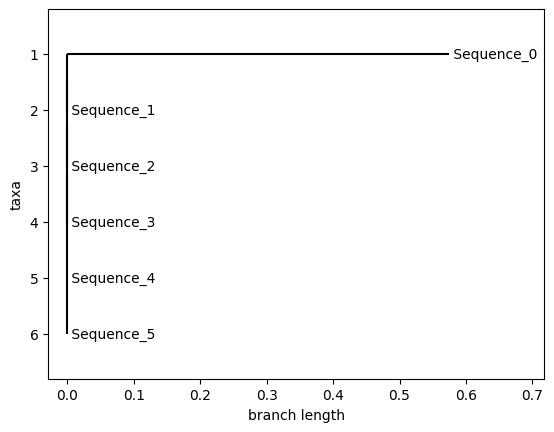

In [ ]:
from Bio import Phylo

# Read the tree file generated by ClustalW
tree = Phylo.read("sequences.dnd", "newick")

# Print the tree structure
Phylo.draw_ascii(tree)

# You can also plot the tree graphically
Phylo.draw(tree)

Summary:

	1.	The unknown sequence is submitted to NCBI BLAST to find homologous sequences.
	2.	Homologous sequences are aligned using ClustalW.
	3.	A phylogenetic tree is constructed to visualize the evolutionary relationships between the unknown sequence and known sequences.

This workflow provides a phylogenetic analysis based on nucleotide sequence comparison. You can further refine this process by adjusting the number of sequences, alignment parameters, or phylogenetic tree construction methods.

## **2B. Input the unknow sequence (one-more)**

In [ ]:
from Bio import SeqIO, Phylo
from Bio.Align.Applications import ClustalwCommandline
import os

# Step 1: Write sequences to a FASTA file
sequences = [
    """>sequence1
    ATGCGTACTGATCGTACTGCTGATCGTACTGCGTGATCGTACGTCGATCGTACG
    """,
    """>sequence2
    ATGCGTACTGATCGTACTGCTGATCGTACTGCCTGATCGTACGTCGATCGTACG
    """,
    """>sequence3
    ATGCGTACTGATCGTACTGCTGATCGTATGCGTGATCGTACGTCGATCGTACG
    """,
    """>sequence4
    ATGCGTACTGATCGTACTGCTGATCGTACGCGTGATCGTACGTCGATCGTACG
    """,
]

fasta_file = "sequences.fasta"
with open(fasta_file, "w") as file:
    for seq in sequences:
        file.write(seq.strip() + "\n")

print(f"Sequences written to {fasta_file}")

# Step 2: Perform multiple sequence alignment with ClustalW
clustalw_exe = "/usr/bin/clustalw"  # Path to ClustalW (Linux default)
clustalw_cline = ClustalwCommandline(clustalw_exe, infile=fasta_file)

# Run ClustalW
stdout, stderr = clustalw_cline()
print("ClustalW alignment complete.")

# Step 3: Read the generated alignment (.aln) and phylogenetic tree (.dnd)
alignment_file = "sequences.aln"
tree_file = "sequences.dnd"

# Read and print the alignment (optional)
alignment = SeqIO.read(alignment_file, "clustal")
print(f"Alignment:\n{alignment.format('clustal')}")

# Step 4: Read the phylogenetic tree in Newick format
tree = Phylo.read(tree_file, "newick")

# Step 5: Display the phylogenetic tree
print("Phylogenetic Tree:")
Phylo.draw_ascii(tree)  # Display the tree in ASCII

# Optional: Graphically plot the tree
import matplotlib.pyplot as plt

Phylo.draw(tree)
plt.show()

Sequences written to sequences.fasta
ClustalW alignment complete.


ValueError: More than one record found in handle

## **2C. Input specific sequence (MT747438)**

In [ ]:
import os
wdir = os.getcwd()
print(wdir)

/Users/tirtasetiawan/Library/CloudStorage/GoogleDrive-tirta.setiawan@sd.itera.ac.id/My Drive/Colab Notebooks/BIOINFORMATICS_LECTURE/SD4108/PERTEMUAN


### OBTAIN BLAST RESULT

Kode ini digunakan untuk menyimpan hasil BLAST. Kita menggunakan sekuen GENBANK dengan accession number MT747438 sebagai query. Merupakan sekuen DNA yang dipilih untuk BLASTN. Jika kamu ingin menggunakan sekuen protein silahkan gunakan BLASNP. BLASX, TBLASTN dan TBLASTTX juga dapat digunakan.

In [ ]:
from Bio.Blast import NCBIWWW
result_handle = NCBIWWW.qblast("blastn", "nt", "MT747438")

with open("blast_BE_isolate.xml", "w+") as save_to:
    save_to.write(result_handle.read())
    result_handle.close()

KeyboardInterrupt: 

A retrieval for one sequence takes from 20 seconds to 50+ minutes. So can be quite long. The median time is about 2 minutes, mean time 5 minutes. Moreover sometimes one can get "[blastsrv4.REAL]: Error: CPU usage limit was exceeded, resulting in SIGXCPU (24)." - thus getting no results at all.

The output is restricted to 50 proteins by default (can be changed by hitlist_size param).

### LOOK AT THE BLAST RESULTS

Print semuan hasil yang memiliki nilai E < 0.0001. Kita print juga deskripsi sekuen, length, E value dan beberapa sekuen pertama dari ALLIGNMENT dengan sekuen query. E value adalah angka untuk sekuen acak yang memiliki kesamaan skor dengan sekuen yang sedang kita gunakan. Semakin rendah nilai E artinya sekuen yang ditemukan memiliki kecocokan yang signifikan

In [ ]:
from Bio.Blast import NCBIXML

result_handle = open("blast_BE_isolate1.xml", 'r')
blast_record = NCBIXML.read(result_handle)

E_VALUE_THRESH = 0.0001
ct = 0
for alignment in blast_record.alignments:
    for hsp in alignment.hsps:
        ct += 1
        if hsp.expect < E_VALUE_THRESH:
            print("\n")
            print('****Alignment****')
            print('sequence: ', alignment.title)
            print('length: ', alignment.length)
            print('E value: ', hsp.expect)
            print(hsp.query[0:75] + '...')
            print(hsp.match[0:75] + '...')
            print(hsp.sbjct[0:75] + '...')

print("\n" + "There are", ct, "sequence in the BLAST output")



****Alignment****
sequence:  gi|2218337339|gb|ON159875.1| Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/CHE/H3018/2020, complete genome
length:  29888
E value:  0.0
AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTA...
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||...
AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTA...


****Alignment****
sequence:  gi|2086970236|emb|OU575971.1| Severe acute respiratory syndrome coronavirus 2 isolate hCoV-19/Switzerland/VD-CHUV-GEN2520/2020 genome assembly, chromosome: 1
length:  29903
E value:  0.0
AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTA...
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||...
AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTA...


****Alignment****
sequence:  gi|2302147511|emb|OX332936.1| Severe acute respiratory syndrome coronavirus 2 isola

## **2D. Covid Example Phylogenetic**

In [ ]:
# Global sequence alignment with ClustalW
# import the commandline software
import os
from Bio.Align.Applications import ClustalwCommandline

in_file = "covid/unaligned.fasta"

# path: /usr/bin/clustalw
clustalw_path = r"/usr/bin/clustalw"

# parsing DNA file (Unaligned)
clustalw_cline = ClustalwCommandline(clustalw_path, infile= in_file)
assert os.path.isfile(clustalw_path), "Clustal_W executable is missing or not found"

#performing the alignment
stdout, stderr = clustalw_cline()

# printing the output
print(clustalw_cline)

/usr/bin/clustalw -infile=covid/unaligned.fasta


In [ ]:
#Generate Alignment output
from Bio import AlignIO
ClustalAlign = AlignIO.read("covid/unaligned.aln", "clustal")
print(ClustalAlign)

Alignment with 100 rows and 1273 columns
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...HYT QHU79173.2
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...HYT QJD47718.1
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...HYT QJQ82996.1
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...HYT QIS30425.1
MFVFFVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...HYT QIQ49882.1
MFVFFVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...HYT QIS60906.1
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...HYT QJG65951.1
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...HYT QJF75467.1
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...HYT YP_009724390.1
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...HYT QII57278.1
MFVFLVLLPLVSSQCVNLTTRTQLPPAHTNSFTRGVYYPDKVFR...HYT QJF77846.1
MFVFLVLLPLVSSQCVNLTTRTQLPPANTNSFTRGVYYPDKVFR...HYT QIA20044.1
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...HYT QIZ16509.1
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...HYT QIZ97039.1
MFVFLVLLPLVSSQCVNLTTRIQLPPAYTNSFTRGVYYPDKVFR...HYT QJQ84843.1
MFVFLVLLPLVSSQCVNLTTRTQLP

In [ ]:
# Generate Dendogram (Tree) output
from Bio import Phylo
tree = Phylo.read("covid/unaligned.dnd", "newick")
Phylo.draw_ascii(tree)

  __________________________ QJF75467.1
 |
 | YP_009724390.1
 |
 |__________________________ QII57278.1
 |
 |             _____________ QJF77846.1
 |____________|
 |            |_____________ QIA20044.1
 |
 |__________________________ QIZ16509.1
 |
 |__________________________ QIZ97039.1
 |
 |__________________________ QJQ84843.1
 |
 |__________________________ QJG65956.1
 |
 |__________________________ QIU81585.1
 |
 |__________________________ QIZ16559.1
 |
 |__________________________ QJD20632.1
 |
 |__________________________ QIS60546.1
 |
 |__________________________ QIT07011.1
 |
 |__________________________ QIO04367.1
 |
 |__________________________ QIS61422.1
 |
 |             _____________ QII87830.1
 |____________|
 |            |_____________ QJF11971.1
 |
 |__________________________ QIS60489.1
 |
 |__________________________ QJG65957.1
 |
 |__________________________ QJQ39524.1
 |
 |__________________________ QIS30335.1
 |
 |__________________________ QJQ84676.1
 |
 |     

# **Week 7. EDA on Variant Covid-19 Sequences**

## **Download Dataset**

You can use Builder:
1. Query -> [All Fields],[Organism],[Gene], etc
3. Filter -> [porgn]
4. Condition -> AND OR NOT

In [ ]:
# Download a large number of records (e.g., 1000 sequences) in batches of 200
def batch_download_sequences(query, batch_size=200, total_records=1000):
    Entrez.email = "your-email@example.com"

    for start in range(0, total_records, batch_size):
        handle = Entrez.esearch(db="nucleotide", term=query, retstart=start, retmax=batch_size)
        record = Entrez.read(handle)
        ids = record["IdList"]

        # Fetch sequences
        handle = Entrez.efetch(db="nucleotide", id=ids, rettype="fasta", retmode="text")
        data = handle.read()
        handle.close()

        with open(f"covid19_sequences_batch_{start}.fasta", "w") as f:
            f.write(data)

        print(f"Downloaded {len(ids)} records (Batch {start // batch_size + 1})")

# Example: Downloading large viral dataset
batch_download_sequences("Homo sapiens[All Fields] AND Severe acute respiratory syndrome coronavirus 2[All Fields]", batch_size=200, total_records=1000)

Downloaded 200 records (Batch 1)
Downloaded 200 records (Batch 2)
Downloaded 200 records (Batch 3)
Downloaded 200 records (Batch 4)
Downloaded 200 records (Batch 5)


### **Combine All Fasta**

In [ ]:
from Bio import SeqIO

# List of input FASTA files you want to combine
fasta_files = ["covid19_sequences_batch_0.fasta", "covid19_sequences_batch_200.fasta",
               "covid19_sequences_batch_400.fasta", "covid19_sequences_batch_600.fasta",
               "covid19_sequences_batch_800.fasta"]

# Name of the output file
output_file = "covid19_combined_sequences.fasta"

# Open the output file for writing
with open(output_file, "w") as outfile:
    for fasta_file in fasta_files:
        # Parse each input FASTA file
        with open(fasta_file, "r") as infile:
            # Use SeqIO.parse to read sequences and write them to the output file
            for record in SeqIO.parse(infile, "fasta"):
                SeqIO.write(record, outfile, "fasta")

print(f"Sequences from {len(fasta_files)} files have been combined into {output_file}")

Sequences from 5 files have been combined into covid19_combined_sequences.fasta


## **3A. Import sekuen covid-19**

In [ ]:
from Bio import SeqIO

# Load the sequences from a FASTA file
fasta_file = "covid19_combined_sequences.fasta"
sequences = list(SeqIO.parse(fasta_file, "fasta"))

# Print the number of sequences loaded
print(f"Loaded {len(sequences)} sequences.")

Loaded 1000 sequences.


### **Extract metadata and save to CSV**

In [ ]:
from Bio import SeqIO
import csv

# Function to extract metadata from FASTA file and save to CSV
def extract_metadata_to_csv(fasta_file, output_csv):
    # Open the CSV file for writing
    with open(output_csv, mode='w', newline='') as csvfile:
        # Define the column headers
        fieldnames = ['Sequence ID', 'Description', 'Sequence Length']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        # Write the header to the CSV file
        writer.writeheader()

        # Parse the FASTA file and extract metadata
        for record in SeqIO.parse(fasta_file, "fasta"):
            writer.writerow({
                'Sequence ID': record.id,
                'Description': record.description,
                'Sequence Length': len(record.seq)
            })

    print(f"Metadata from {fasta_file} has been written to {output_csv}")

# Example usage
fasta_file = fasta_file  # Replace with the path to your FASTA file
output_csv = "covid19_metadata.csv"    # Replace with the desired output CSV file path
extract_metadata_to_csv(fasta_file, output_csv)

Metadata from covid19_combined_sequences.fasta has been written to covid19_metadata.csv


### **Customizing Metadata: Parsing the Description Further**
If the description contains more structured metadata (e.g., organism, gene name), you can further parse the description field before writing to the CSV file

In [ ]:
print(record)

PQ321429.1


In [ ]:
parts = record.description.split('/')
print(parts)

['PQ321429.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2', 'human', 'USA', 'TN-SPHL-2898', '2024, complete genome']


In [ ]:
print(parts[1])

human


In [ ]:
for part in parts:

    print(part)


PQ321429.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2
human
USA
TN-SPHL-2898
2024, complete genome


In [ ]:
description = record.description

def parse_description(description):
    # This function assumes the description is of the form: "Homo sapiens (human), gene: BRCA1"
    parts = description.split('/')
    metadata = {}

    for part in parts:
        key_value = part.split(':')
        if len(key_value) == 2:
            key, value = key_value
            metadata[key.strip()] = value.strip()

    return metadata

# Example usage of parsing
parsed_metadata = parse_description("Severe acute respiratory syndrome coronavirus 2,human")
print(parsed_metadata)

{}


### **Writing Additional Metadata to CSV**

In [ ]:
def extract_metadata_to_csv(fasta_file, output_csv):
    # Open the CSV file for writing
    with open(output_csv, mode='w', newline='') as csvfile:
        # Define additional columns for organism and gene
        fieldnames = ['Sequence ID', 'Description', 'Organism', 'Gene', 'Sequence Length']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        # Write the header to the CSV file
        writer.writeheader()

        # Parse the FASTA file and extract metadata
        for record in SeqIO.parse(fasta_file, "fasta"):
            # Extract organism and gene from the description
            parsed_metadata = parse_description(record.description)
            organism = parsed_metadata.get('organism', 'Unknown')
            gene = parsed_metadata.get('gene', 'Unknown')

            # Write metadata to CSV
            writer.writerow({
                'Sequence ID': record.id,
                'Description': record.description,
                'Organism': organism,
                'Gene': gene,
                'Sequence Length': len(record.seq)
            })

    print(f"Metadata from {fasta_file} has been written to {output_csv}")

## **3B. Basic metadata analysis**

FASTA files typically contain sequence data, but they can also include metadata in the sequence headers (description lines) starting with a > symbol. The metadata in a FASTA file is often encoded in the header line that precedes the sequence, providing details such as the sequence identifier (ID), description, and sometimes additional information depending on the source (e.g., species, gene name, etc.).

In [ ]:
import pandas as pd

# Load the metadata (assuming you have a CSV file)
metadata_file = "covid19_metadata.csv"
metadata = pd.read_csv(metadata_file)

# Explore the metadata
print(metadata.head())  # View first few rows
print(metadata.describe())  # Summary statistics

  Sequence ID                                        Description  \
0  PQ325448.1  PQ325448.1 Severe acute respiratory syndrome c...   
1  PQ325447.1  PQ325447.1 Severe acute respiratory syndrome c...   
2  PQ325446.1  PQ325446.1 Severe acute respiratory syndrome c...   
3  PQ325445.1  PQ325445.1 Severe acute respiratory syndrome c...   
4  PQ325444.1  PQ325444.1 Severe acute respiratory syndrome c...   

   Sequence Length  
0            29646  
1            29649  
2            29646  
3            29646  
4            29649  
       Sequence Length
count      1000.000000
mean      29739.272000
std         111.225092
min       28662.000000
25%       29704.000000
50%       29706.000000
75%       29847.000000
max       29891.000000


## **3C. Nucleotide Composition Analysis**

Let’s analyze the nucleotide composition of the sequences (A, T, G, C content):

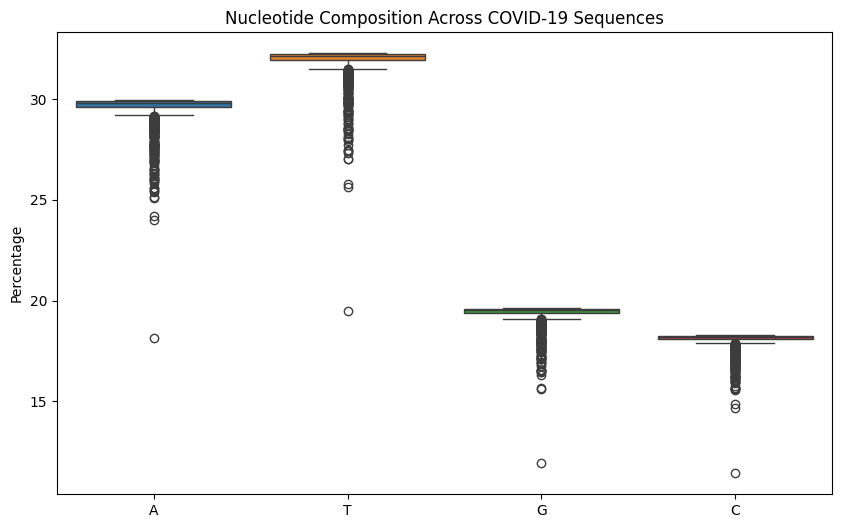

In [ ]:
from collections import Counter

# Function to calculate nucleotide composition
def nucleotide_composition(seq):
    count = Counter(str(seq.seq))
    total = sum(count.values())
    return {
        'A': count['A'] / total * 100,
        'T': count['T'] / total * 100,
        'G': count['G'] / total * 100,
        'C': count['C'] / total * 100
    }

# Apply nucleotide composition analysis to all sequences
composition_data = [nucleotide_composition(seq) for seq in sequences]

# Create a DataFrame from the composition data
composition_df = pd.DataFrame(composition_data)

# Plot the nucleotide composition
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=composition_df)
plt.title("Nucleotide Composition Across COVID-19 Sequences")
plt.ylabel("Percentage")
plt.show()

## **3D. Identify Mutations Compared to Reference Genome**

You can compare the COVID-19 variant sequences against a reference genome (e.g., the original Wuhan strain) to detect mutations.

**Download Reference**

In [ ]:
def fetch_viral_sequences(query, max_records):
    Entrez.email = "your-email@example.com"

    # Search for viral sequences
    search_handle = Entrez.esearch(db="nucleotide", term=query, retmax=max_records)
    search_results = Entrez.read(search_handle)
    search_handle.close()

    ids = search_results["IdList"]

    # Fetch the sequences in FASTA format
    fetch_handle = Entrez.efetch(db="nucleotide", id=ids, rettype="fasta", retmode="text")
    sequences = list(SeqIO.parse(fetch_handle, "fasta"))
    fetch_handle.close()

    # Save to a file
    with open("viral_sequences.fasta", "w") as output_handle:
        SeqIO.write(sequences, output_handle, "fasta")

    return sequences

# Example usage: Fetching SARS-CoV-2 sequences
viral_sequences = fetch_viral_sequences("Severe acute respiratory syndrome coronavirus 2[All Fields]) AND isolate[All Fields] AND Wuhan-Hu[All Fields] AND complete[All Fields] AND genome.[All Fields]", max_records=10)

**Check Mutation**

In [ ]:
# Load the reference genome
reference_file = "reference_sequence.fasta"
reference_seq = list(SeqIO.parse(reference_file, "fasta"))[0]

# Function to find mutations compared to reference
def find_mutations(reference, variant):
    mutations = []
    for i, (ref_base, var_base) in enumerate(zip(reference.seq, variant.seq)):
        if ref_base != var_base:
            mutations.append((i, ref_base, var_base))  # (position, ref_base, variant_base)
    return mutations

# Apply mutation analysis to all variant sequences
mutation_data = [find_mutations(reference_seq, seq) for seq in sequences]

# Display the first few mutations for the first sequence
print(f"Mutations for {sequences[0].id}:")
for mutation in mutation_data[0][:20]:  # Show first 10 mutations
    print(f"Position: {mutation[0]}, Reference: {mutation[1]}, Variant: {mutation[2]}")

Mutations for PQ325448.1:
Position: 1, Reference: T, Variant: G
Position: 2, Reference: T, Variant: A
Position: 3, Reference: A, Variant: T
Position: 4, Reference: A, Variant: C
Position: 5, Reference: A, Variant: T
Position: 7, Reference: G, Variant: T
Position: 9, Reference: T, Variant: C
Position: 11, Reference: A, Variant: C
Position: 14, Reference: C, Variant: A
Position: 15, Reference: C, Variant: A
Position: 16, Reference: T, Variant: C
Position: 17, Reference: T, Variant: G
Position: 18, Reference: C, Variant: A
Position: 19, Reference: C, Variant: A
Position: 21, Reference: A, Variant: T
Position: 22, Reference: G, Variant: T
Position: 23, Reference: G, Variant: T
Position: 24, Reference: T, Variant: A
Position: 27, Reference: C, Variant: A
Position: 28, Reference: A, Variant: T


## **3E. Phylogenetic Analysis**

In [ ]:
from Bio.Align.Applications import ClustalwCommandline
from Bio import Phylo

# Write the sequences to a new FASTA file for alignment
SeqIO.write(sequences, "covid_sequences.fasta", "fasta")

# Perform alignment with ClustalW
clustalw_exe = "/usr/bin/clustalw"  # Path to ClustalW executable
clustalw_cline = ClustalwCommandline(clustalw_exe, infile="covid19_combined_sequences.fasta")
stdout, stderr = clustalw_cline()

# Read the generated tree
tree = Phylo.read("covid19_sequences.dnd", "newick")

# Display the phylogenetic tree
Phylo.draw_ascii(tree)

## **3F. Analyze Geographic and Temporal Patterns**

In [ ]:
# Count the occurrences of each variant by location
location_counts = metadata.groupby('location')['variant'].value_counts().unstack().fillna(0)

# Plot the distribution of variants by location
plt.figure(figsize=(12, 8))
location_counts.plot(kind='bar', stacked=True)
plt.title("Distribution of COVID-19 Variants by Location")
plt.ylabel("Number of Sequences")
plt.show()

In [ ]:
# Ensure 'date' is in datetime format
metadata['date'] = pd.to_datetime(metadata['date'])

# Group by date and variant to count occurrences
temporal_counts = metadata.groupby([metadata['date'].dt.to_period('M'), 'variant']).size().unstack().fillna(0)

# Plot the temporal distribution of variants
plt.figure(figsize=(12, 6))
temporal_counts.plot(kind='line')
plt.title("Temporal Distribution of COVID-19 Variants")
plt.ylabel("Number of Sequences")
plt.xlabel("Date")
plt.show()

# **Week 11. Mutation Detection (Advance)**

Lets take a closer look at SARS COV-2. SARS COV-2 has an high affinity for **ACE2 receptors** on the humans cells. They use **ACE2 receptors to dock on to the human cells before endocytosis**. From the figure, it is quite clear that the virus has the following structural proteins namely **Spike protein, Nucleocapsid protein, Membrane protein and Envelope protein**. The vaccine/drug development efforts targets specific viral protein structures/enzymes. It is very important that we understand the viral mutations before such a target is decided. **If the target protein structure undergoes mutation then the drug/vaccine may not be effective in the future**. This is where the mutation analysis plays a critical role in the efforts to create a drug/vaccine. The SARS COV-2 genome consist of **11 genes**. Each gene and there expressions (Proteins) are listed below.

1. **gene=ORF1ab**, Open Reading Frame 1 which encodes for the proteins ORF1a and ORF1ab. This creates several non structural protein as-well.

2. **gene=S**, This gene encodes Spike Protein which docks with the ACE2 receptors of the human cell before endocytosis.This is a trimer protein with S1 and S2 subunits.

3. **gene=ORF3a**, Open Reading Frame 3 which encodes for ORF3a protein.

4. **gene=E**, This gene encodes for the Envelope protein.

5. **gene=M**, This gene encodes for the Membrane protein.

6. **gene=ORF6**, Open Reading Frame 6 which encodes for ORF6 protein.

7. **gene=ORF7a**, Open Reading Frame 7a which encodes for ORF7a protein.

8. **gene=ORF7b**, Open Reading Frame 7b which encodes for ORF7b protein.

9. **gene=ORF8**, Open Reading Frame 8 which encodes for ORF8 protein.

10. **gene=N**, This gene encodes for the Nucleocapsid phosphoprotein.

11. **gene=ORF10**, Open Reading Frame 10 which encodes for ORF10 protein.

In [ ]:
# dna.py
# import the dictionary that can be used for the amino acid translation.
import numpy as np

#This is the core module developed as part of the effort.
class dna:

    # Constructor method
    def __init__(self,dna_seq):
        dna_seq = dna_seq.upper() # Convert the nucleotide bases to Upper Case
        for seq in dna_seq:
            # Valid nucleotide bases. If not a valid sequence raise an Error
            if seq not in ['A','T','G','C',' ','N']:
                error = 'Wrong DNA Sequence {}!!'.format(seq)
                raise ValueError(error)
        # Remove all of the empty characters in the nucleotide sequence.
        dna_seq = dna_seq.replace(' ','')
        self.dir_3_5=dna_seq
        self.dir_5_3=self.dir_5_3_strand()
        self.mRna = None
        self.amino_acid = None
        self.num_array = None
        self.nucl_len = len(dna_seq)

    def __repr__(self):
        return "DNA has {} nucleotide and they are {} :".format(self.nucl_len,self.dir_3_5)

    def __eq__(self, other):
        if other is None:
            return False
        return self.seq == other.seq

    #def replicate(self):
    #    return

    def transcription(self):
        # This is a method that imitates the transcription of a gene to mRNA for Protein transalation.
        # This is mostly of the future use.
        trans=''
        for nuc in self.dir_5_3:
            if nuc == 'A':
                trans += 'U'
            if nuc == 'T':
                trans += 'A'
            if nuc == 'C':
                trans += 'G'
            if nuc == 'G':
                trans += 'C'
            if nuc == 'N':
                trans += 'N'
        self.mRna = trans
        return self.mRna

    def translation(self):
        # This is the method where the transcripted mRNA gets translated into Amino Acid. Each 3
        # base in the mRNA codes for an amino acid.
        begin = 'No'
        ac = ''
        for i in range(0,len(self.mRna)-3,3):
            if self.mRna[i:3] == 'AUG':
                begin = 'Yes'
            if self.mRna[i:3] in ('UAA','UAG','UGA'):
                being = 'No'
            if begin == 'Yes':
                ac+= amacid_dict[self.mRna[i:3+i]][0]
        self.amino_acid = ac
        return self.amino_acid

    def dir_5_3_strand(self):
        dir_5_3 = ''
        # This is a method which reads the 3 - 5 prime sequence and creates the 5 - 3 prime sequence.
        for nuc in self.dir_3_5:
            if nuc == 'A':
                dir_5_3 += 'T'
            if nuc == 'T':
                dir_5_3 += 'A'
            if nuc == 'C':
                dir_5_3 += 'G'
            if nuc == 'G':
                dir_5_3 += 'C'
            if nuc == 'N':
                dir_5_3 += 'N'
        return dir_5_3

    def numpfy(self):
        # This method takes in a dna sequence and convert them into numpy array.
        # Each of the nucleotide sequence is converted into one of the below numbers
        # which then can be used in for analysis and comparison.
        arr = ''
        for i in self.dir_3_5:
            if i == 'A':
                arr += '0 '
            if i == 'T':
                arr += '255 '
            if i == 'C':
                arr += '100 '
            if i == 'G':
                arr += '200 '
            if i == 'N':
                arr += '75 '
        arr_np = np.fromstring(arr,dtype=np.uint8,sep=' ')
        self.num_array = arr_np
        return self.num_array

# helper.py
# import the dictionary that will have the information to add dummy nucleotides 'N' at the end of each gene
# to numpy the gene into a numpy array.
#from scov import numpy_image_dict

def read_dna_seq(file_name):
    # This method reads the dna sequence from the file downloaded from NCBI and crates a python dictionary.
    fil = open(file_name,'r')
    fil_list = fil.readlines()
    fil.close

    genome = {}
    gene_name = ''
    protein_name = ''
    gene_seq = ''
    for i in fil_list:
        if i[0] == '>':
            # Reads each line from the file and creates a dictionary with the following information for each
            # gene. {<'gene_name-1'>:[<protein_name>,nucleotide sequence],
            #        <'gene_name-2'>:[<protein_name>,nucleotide sequence],
            #        <'gene_name-2'>:[<protein_name>,nucleotide sequence]}
            if list(genome.keys()) != []:
                gene_seq = gene_seq.replace('\n','')
                genome[gene_name].append(gene_seq)
            gene_seq = ''
            g_st = i.find('[gene=')
            g_end = i[g_st:].find(']')
            p_st = i.find('[protein=')
            p_end = i[p_st:].find(']')

            if g_st > 0 and g_end > 0:
                gene_name = i[g_st+1:g_st+g_end]
                genome[gene_name] = []

            if p_st > 0 and p_end > 0:
                protein_name = i[p_st+1:p_st+p_end]
                genome[gene_name].append(protein_name)
        else:
            gene_seq += i
    gene_seq = gene_seq.replace('\n','')
    genome[gene_name].append(gene_seq)
    return genome

def gene_mod(genome):
    # This method modifies each of the sequence with dummy nucleotide 'N' so that for the shape of the numpy array.
    genome_keys = list(genome.keys())
    for k in genome_keys:
        if len(numpy_image_dict[k]) > 1:
            N = numpy_image_dict[k][1]
            seq = add_N(N,genome[k][1])
            genome[k][1] = seq
    return genome

def add_N(n,seq):
    # This method is called from gene_mod() method, for creating dummy nucleotide 'N'.
    for i in range(0,n):
        seq += 'N'
    return seq

# scov.py
# This dictionary is used for reshaping the numpy array for each of the genes.
# For example, the gene ORF1ab numpy array will be reshaped with rows=115 and cols=115.
# The second element in the list represent 'n' number of dummy 'N' to be added at the end of
# each gene nucletide seq to make to compactible with the rows and cols of the array.
numpy_image_dict = {'gene=ORF1ab':[(115,115),7],
                    'gene=S':[(62,62),22],
                    'gene=ORF3a':[(28,30),12],
                    'gene=E':[(15,16),12],
                    'gene=M':[(26,27),33],
                    'gene=ORF6':[(14,14),10],
                    'gene=ORF7a':[(19,20),14],
                    'gene=ORF7b':[(12,12),12],
                    'gene=ORF8':[(19,20),14],
                    'gene=N':[(36,36),36],
                    'gene=ORF10':[(11,11),4]}


# This dictionary has the codons for the amino acids from mRNA.
amacid_dict = {'UUU':('F','PHE','Phenylalanine'),'UUC':('F','PHE','Phenylalanine'),
               'UUA':('L','LEU','Leucine'),'UUG':('L','LEU','Leucine'),
               'UCU':('S','SER','Serine'),'UCC':('S','SER','Serine'),
               'UCA':('S','SER','Serine'),'UCG':('S','SER','Serine'),
               'UAU':('Y','TYR','Tyrosine'),'UAC':('Y','TYR','Tyrosine'),
               'UAA':('STOP'),'UAG':('STOP'),
               'UGU':('C','CYS','Cysteine'),'UGC':('C','CYS','Cysteine'),
               'UGA':('STOP'),'UGG':('W','TRP','Tryptophan'),
               'CUU':('L','LEU','Leucine'),'CUC':('L','LEU','Leucine'),
               'CUA':('L','LEU','Leucine'),'CUG':('L','LEU','Leucine'),
               'CCU':('P','PRO','Proline'),'CCC':('P','PRO','Proline'),
               'CCA':('P','PRO','Proline'),'CCG':('P','PRO','Proline'),
               'CAU':('H','HIS','Histidine'),'CAC':('H','HIS','Histidine'),
               'CAA':('Q','GLU','Glutamine'),'CAG':('Q','GLU','Glutamine'),
               'CGU':('R','ARG','Arginine'),'CGA':('R','ARG','Arginine'),
               'CGG':('R','ARG','Arginine'),'CGC':('R','ARG','Arginine'),
               'AUU':('I','ILE','Isoleucine'),'AUC':('I','ILE','Isoleucine'),
               'AUA':('I','ILE','Isoleucine'),'AUG':('M','MET','Methionine'),
               'ACU':('T','THR','Threonine'),'ACC':('T','THR','Threonine'),
               'ACA':('T','THR','Threonine'),'ACG':('T','THR','Threonine'),
               'AAU':('N','ASN','Asparagine'),'AAC':('N','ASN','Asparagine'),
               'AAA':('K','LYS','Lysine'),'AAG':('K','LYS','Lysine'),
               'AGU':('S','SER','Serine'),'AGC':('S','SER','Serine'),
               'AGG':('R','ARG','Arginine'),'AGA':('R','ARG','Arginine'),
               'GUU':('V','VAL','Valine'),'GUC':('V','VAL','Valine'),
               'GUA':('V','VAL','Valine'),'GUG':('V','VAL','Valine'),
               'GCU':('A','ALA','Alanine'),'GCC':('A','ALA','Alanine'),
               'GCA':('A','ALA','Alanine'),'GCG':('A','ALA','Alanine'),
               'GAU':('D','ASP','Aspartate'),'GAC':('D','ASP','Aspartate'),
               'GAA':('E','GLU','Glutamate'),'GAG':('E','GLU','Glutamate'),
               'GGU':('G','GLY','Glycine'),'GGC':('G','GLY','Glycine'),
               'GGA':('G','GLY','Glycine'),'GGG':('G','GLY','Glycine')
}

Mutated DNA Base 100 in China and Base 255 in USA at position (74, 6) For the Gene ORF1ab
Mutated DNA Base 255 in China and Base 100 in USA at position (12, 10) For the Gene ORF8
Mutated DNA Base 0 in China and Base 255 in USA at position (17, 24) For the Gene N


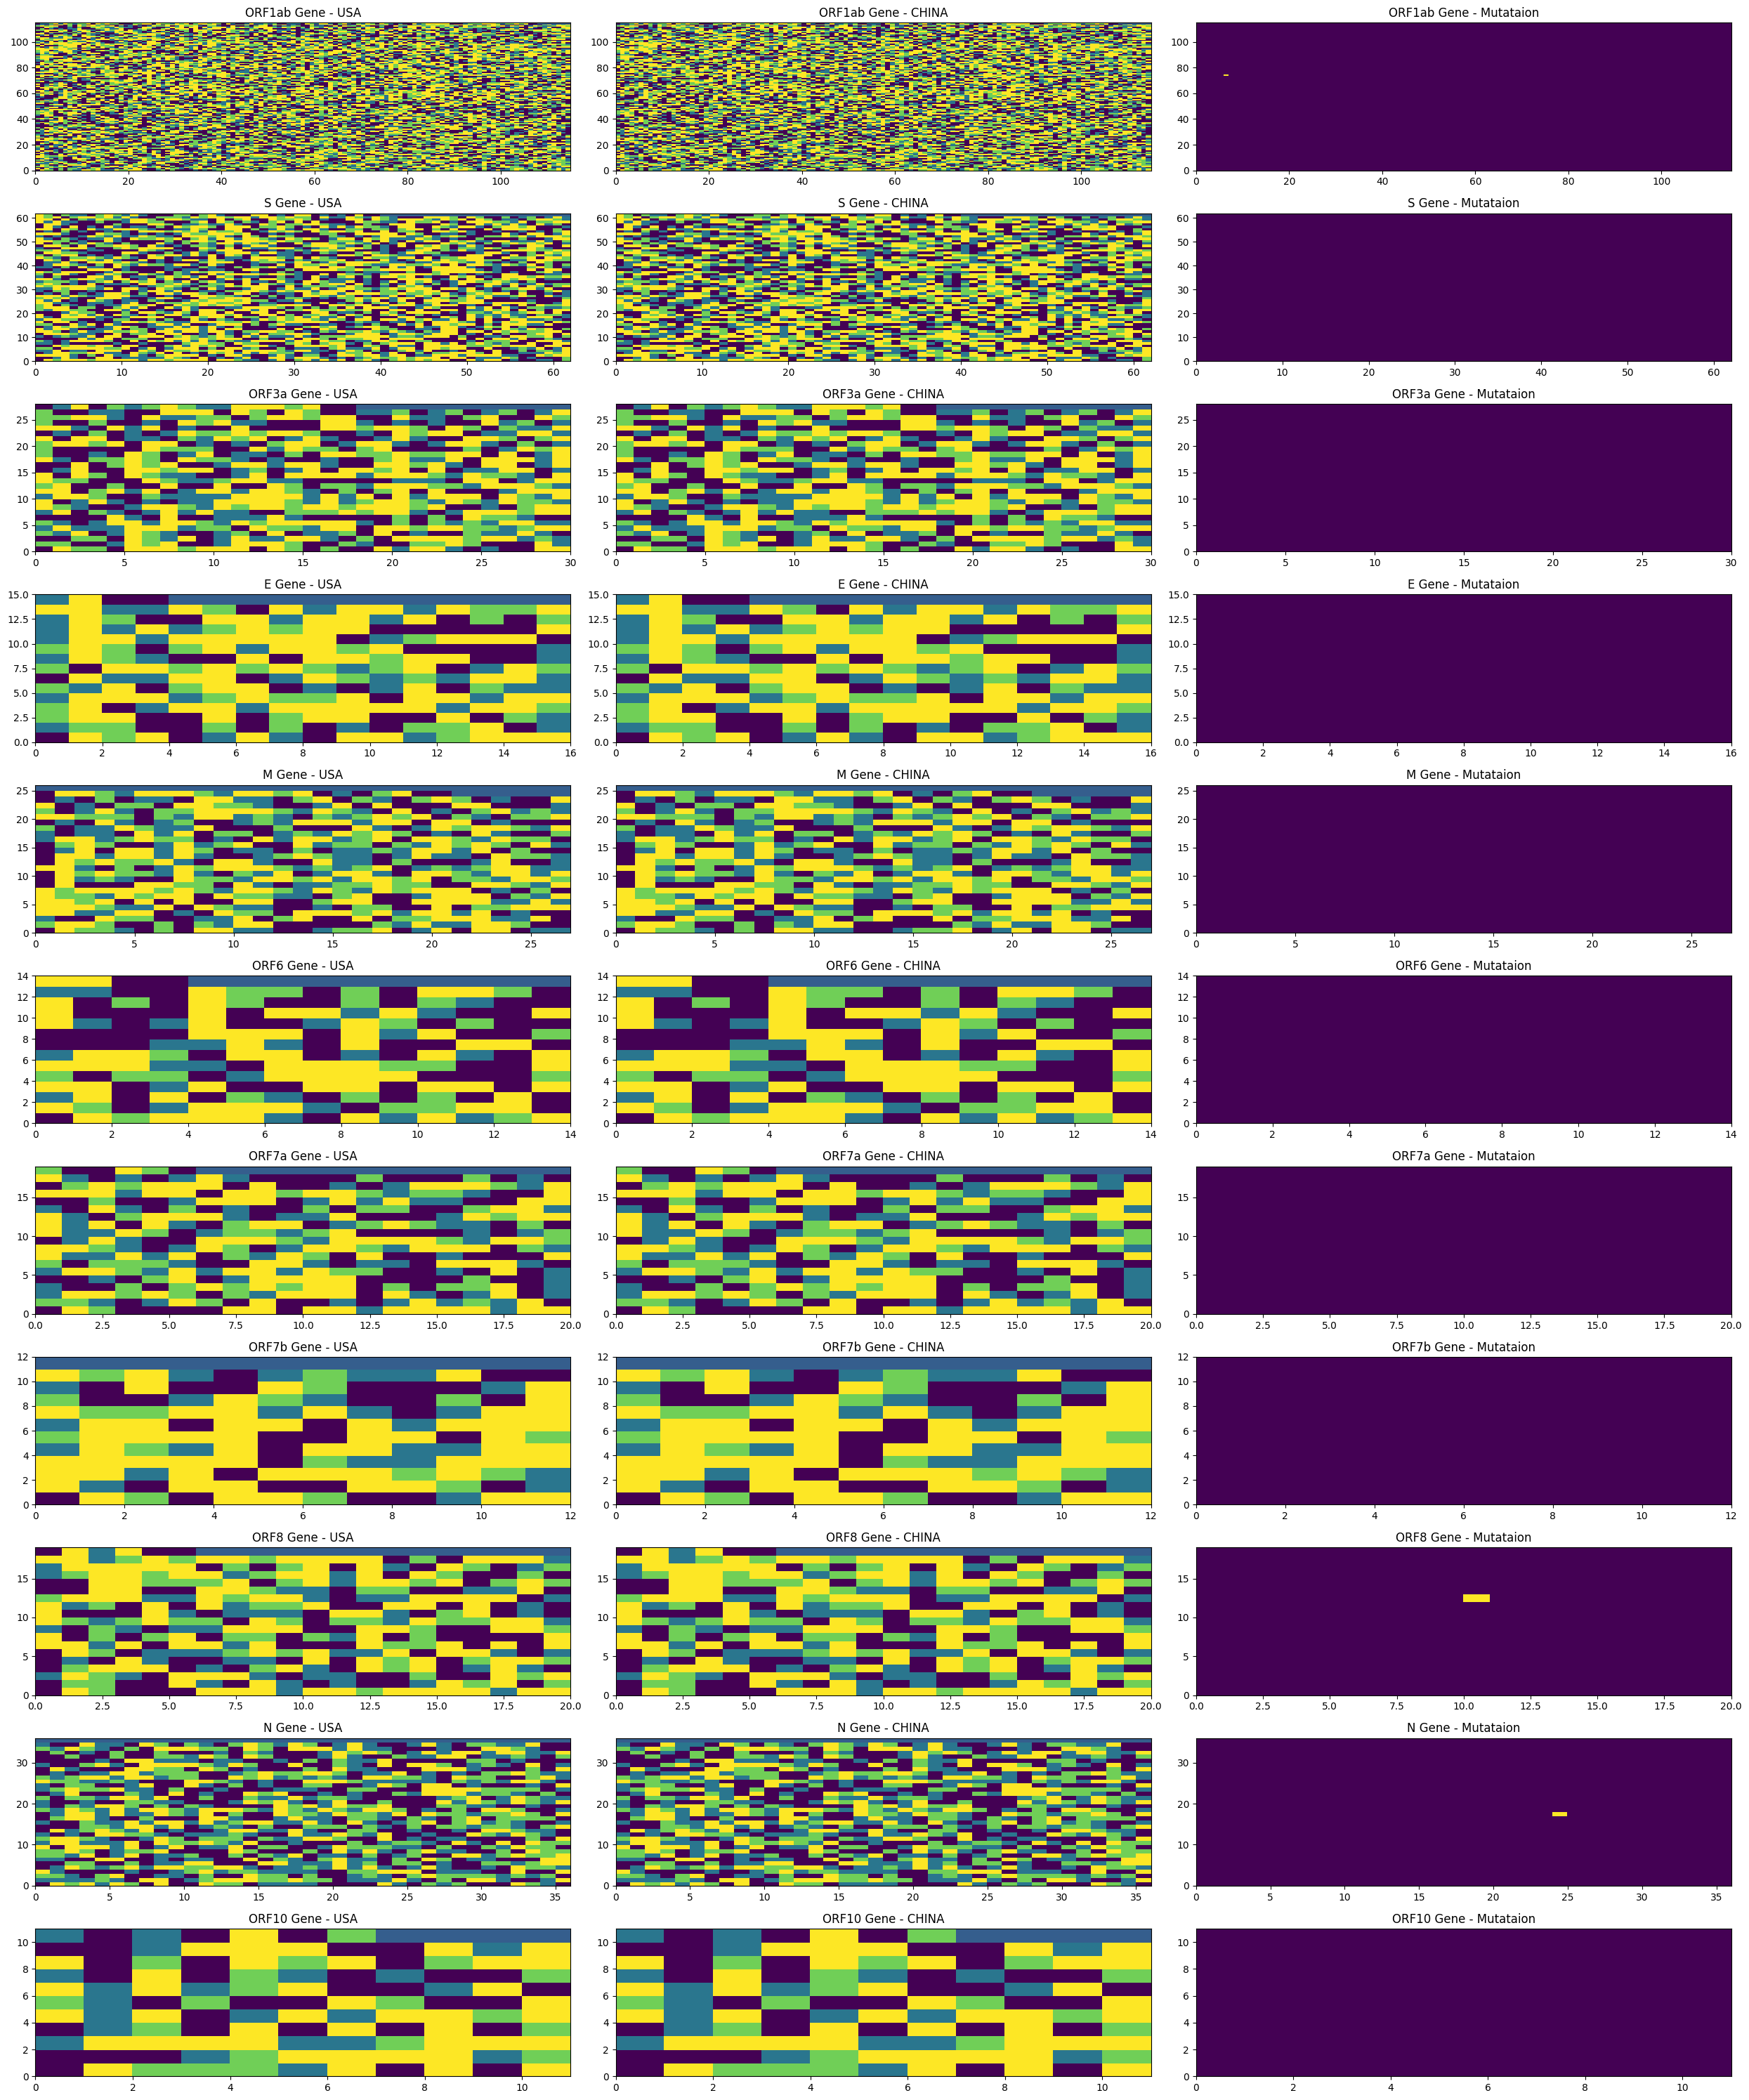

In [ ]:
# main.py
# import all of the required modules
# from dna import dna
import numpy as np
import matplotlib.pyplot as plt
# from scov import numpy_image_dict
# from helper import *

# Read the dna sequence file-1 previously downloaded from NCBI.
dict_seq_1 = read_dna_seq('USA_Seq_2020_Jan.txt')
# Modify the sequence with dummy 'N' nucleotide.
dict_seq_1 = gene_mod(dict_seq_1)

# Read the dna sequence file-2 previously downloaded from NCBI.
dict_seq_2 = read_dna_seq('China_Seq_2019_Dec.txt')
# Modify the sequence with dummy 'N' nucleotide.
dict_seq_2 = gene_mod(dict_seq_2)

# Create matplotlib subplots for each gene.
f,ax = plt.subplots(nrows=11,ncols=3,figsize=(25,30))
gene_name = list(numpy_image_dict.keys())
row = 0
col = 0
mut_dict={}
for i in gene_name:
    G = i[5:]
    # Loop thru each gene in the Cornona Virus nucleotide sequence.
    gene_us = dna(dict_seq_1['gene='+G][1])
    # Invoke the transcription method of the class dna
    gene_us.transcription()
    # Invoke the mothod that converts the gene sequence into a numpy array.
    numpfy_usa = gene_us.numpfy()
    # Reshape the numpy array with a predeifned shape from the numpy_image_dict dictionary.
    numpfy_usa = numpfy_usa.reshape(numpy_image_dict['gene='+G][0])
    # sub-plot the numpy array with matplotlib pcolor method.
    ax[row][col].pcolor(numpfy_usa)
    ax[row][col].set_title(G+' Gene - USA')
    col+=1
    gene_china = dna(dict_seq_2['gene='+G][1])
    # Invoke the transcription method of the class dna
    gene_china.transcription()
    # Invoke the mothod that converts the gene sequence into a numpy array.
    numpfy_china = gene_china.numpfy()
    # Reshape the numpy array with a predeifned shape from the numpy_image_dict dictionary.
    numpfy_china = numpfy_china.reshape(numpy_image_dict['gene='+G][0])
    # sub-plot the numpy array with matplotlib pcolor method.
    ax[row][col].pcolor(numpfy_china)
    ax[row][col].set_title(G+' Gene - CHINA')
    col+=1

    # To find the gene mutation subtract the numpy array from base sequence with the newer sequence. Here the
    # the Chinese sequence is the base sequence and the USA sequence is a newer sequence.
    mut = numpfy_china - numpfy_usa
    if mut.any():
        # Here we are looking for a non zero value in the mutated numpy array (result of the subtracting the 2 numpy arrays).
        # Presence of non-zero value means that there is difference between the 2 numpy arrays and the gene has
        # mutataions. If there are mutations in the gene create a python dictionary "mut_dict" with details as below.
        # {'<Gene_Name-1>': [[<value_of_base_seq>, <value_of_newer_seq>, <value_in_mutated_numpy>, (x_value,y_value)]], '<Gene_Name-2>': [[<value_of_base_seq>, <value_of_newer_seq>, <value_in_mutated_numpy>, (x_value,y_value)]]}
        mut_nec = np.nonzero(mut)
        x=mut_nec[0]
        y=mut_nec[1]
        l=0
        mut_dict[G]=[]
        for i in x:
            us_base = numpfy_usa[i][y[l]]
            ch_base = numpfy_china[i][y[l]]
            mut_base = mut[i][y[l]]
            info_list = [ch_base,us_base,mut_base,(i,y[l])]
            mut_dict[G].append(info_list)
            print("Mutated DNA Base {} in China and Base {} in USA at position {} For the Gene {}".format(ch_base,us_base,(i,y[l]),G))
            l+= 1
    # Giving a title to the matplotlib subplot
    ax[row][col].pcolor(mut)
    ax[row][col].set_title(G+' Gene - Mutataion')
    row+= 1
    col=0

f.tight_layout()
# Saving the matplotlib subplot as a jpg.
f.savefig('Sars_Cov-2_Gene_Mutation.jpg')

# **Week 10. Protein Identifications**

Viral protein adalah protein yang dibuat oleh virus. Virus menyadap inangnya sebagai mesin untuk mendukung siklus hidupnya, mereka mengencode beberapa gen. Viral protein secara umum merupakan struktur komponen untuk bagian envelope dan capsid.

Pada studi ini kita akan melakukan identifikasi viral protein dari NOVEL COVID-19 GENOME. Genome ini disekuensing dari sampel bronchoalveolar lavage fluid seorang pasien yang bekerja di sebuah pasar yang disimpan pada rumah sakit utama dari Wuhan pada tanggal 26 Desember 2019.


source: https://www.kaggle.com/code/amiiiney/covid-19-proteins-identification-with-biopython/input?select=A_new_coronavirus_associated_with_human_respirator.pdf

## **Install & import**

In [ ]:
!pip install dna_features_viewer
!pip install bokeh pandas
!pip install bcbio-gff

In [ ]:
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
import pandas as pd
from Bio.Seq import Seq
import csv

from Bio.Blast import NCBIWWW, NCBIXML
import time  # To avoid overwhelming the server with requests
import matplotlib.pyplot as plt
from dna_features_viewer import BiopythonTranslator
from Bio import SeqIO
import numpy as np

## **Reading DNA Sequence**

In [ ]:
covid19 = SeqIO.read('MN908947.fna', "fasta")

print(f'The genome of the virus causing Covid-19 (known as SARS-CoV-2) consists of {len(covid19)} genetic bases or letters.')

The genome of the virus causing Covid-19 (known as SARS-CoV-2) consists of 29903 genetic bases or letters.


In [ ]:
#Count the nucleotides frequency in the DNA
covid_DNA= covid19.seq
DNA= covid_DNA
nucleotides={}
for n in DNA:
    if n in nucleotides:
        nucleotides[n] += 1
    else:
        nucleotides[n] =  1
print(nucleotides)

#Create a dataframe
nts= pd.DataFrame(data=nucleotides, index=[0]).T.reset_index()
nts= nts.rename(columns={0: 'frequency', 'index': 'nucleotides'})
nts=nts.sort_values(by=['frequency'], ascending=True)

{'A': 8954, 'T': 9594, 'G': 5863, 'C': 5492}


<ipython-input-33-e65202bcc448>:25: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Frequency')


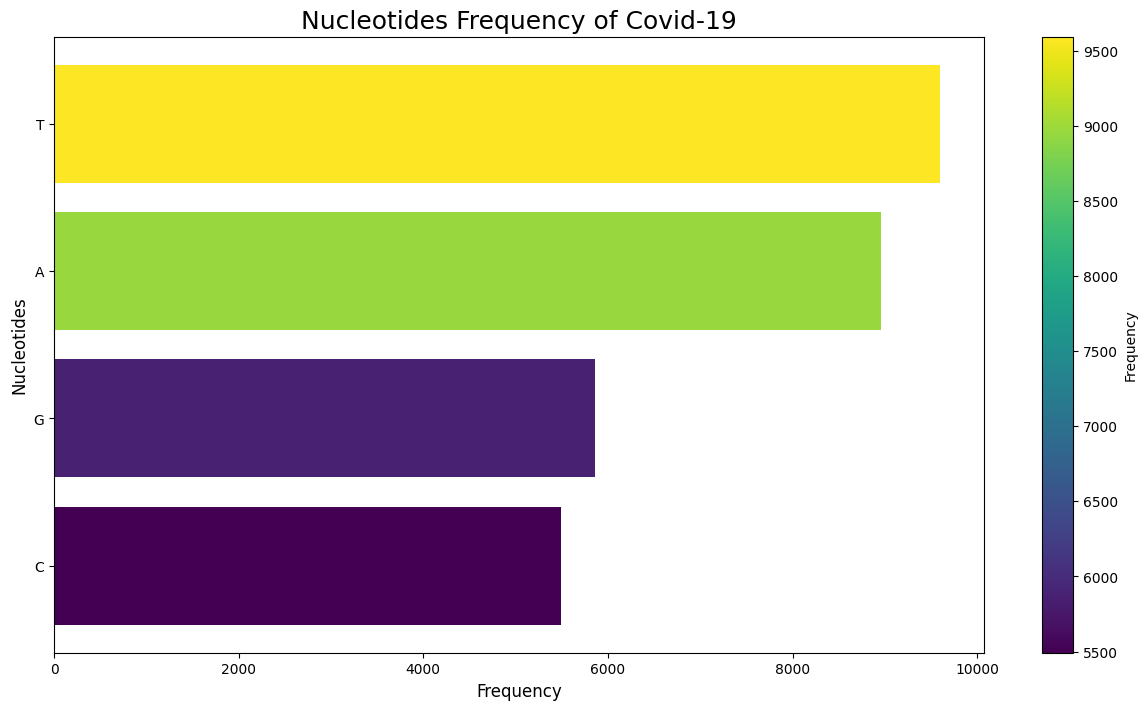

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have already created the `aas` DataFrame as described
# Example data
#amino_acids = {'A': 5, 'C': 7, 'D': 2, 'E': 8, 'F': 4}  # Replace with your actual data
#aas1 = pd.DataFrame(data=amino_acids, index=[0]).T.reset_index()
#aas1 = aas1.rename(columns={0: 'frequency', 'index': 'amino_acids'})
#aas1 = aas1.sort_values(by=['frequency'], ascending=True)

# Normalize the frequency values to [0, 1] for gradient mapping
norm = plt.Normalize(vmin=nts['frequency'].min(), vmax=nts['frequency'].max())
colors = plt.cm.viridis(norm(nts['frequency']))  # Using the 'viridis' colormap for the gradient

# Create the bar chart
plt.figure(figsize=(15, 8))

# Plot horizontal bar chart with gradient color
plt.barh(nts['nucleotides'], nts['frequency'], color=colors)

# Add color bar (optional)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  # Only needed for adding a color bar
plt.colorbar(sm, label='Frequency')

# Add titles and labels
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Nucleotides', fontsize=12)
plt.title('Nucleotides Frequency of Covid-19', fontsize=18)

# Display the plot
plt.show()

## **Transcribe**

In [ ]:
covid_mRNA = covid_DNA.transcribe()

In [ ]:
print(f'Covid-19 DNA: {covid_DNA[:50]}')
print(f'Covid-19 RNA: {covid_mRNA[:50]}')

Covid-19 DNA: ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTC
Covid-19 RNA: AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUC


## **Translate**

In [ ]:
covid_aa = covid_mRNA.translate()
print(covid_aa[:99])
print(f"Covid-19's genome has {len(covid_aa)} amino acids")

IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER*DGEPCPWFQRE
Covid-19's genome has 9967 amino acids


In [ ]:
# We have several chains of a total of 9967 amino acids separated with stop codons *
# The split() function splits the sequence at any stop codon and keeps the amino acids chains separated. This makes it easier for further analysis.
Proteins = covid_aa.split('*')
print(f'We have {len(Proteins)} amino acid chains in the covid-19 genome, here are the first five:')
Proteins[:5]

We have 775 amino acid chains in the covid-19 genome, here are the first five:


[Seq('IKGLYLPR'),
 Seq('QTNQLSISCRSVL'),
 Seq('TNFKICVAVTRLHA'),
 Seq('CTHAV'),
 Seq('LITNYCR')]

## **Recap**

1- We started our analysis with the whole genome, that has 29903 nucleotides.

2- Transcribed the DNA or copied it out to an mRNA.

3- The mRNA was translated to 9967 amino acids.

4- The amino acid sequences were split at the stop codons.

5- We ended up with 775 amino acid chains.

In [ ]:
for i in Proteins[:]:
    if len(i) < 50:
        Proteins.remove(i)

print(f'We have {len(Proteins)} proteins with  more than 50 amino acids in the covid-19 genome:')
Proteins

We have 5 proteins with  more than 50 amino acids in the covid-19 genome:


[Seq('CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQ...VNN'),
 Seq('ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRATATIPIQA...VPL'),
 Seq('AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNI...LLV'),
 Seq('QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSLTENKYSQL...EID'),
 Seq('TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPFHPLADN...KTE')]

In [ ]:
# Step 3: Save multiple protein sequences to a CSV file
with open("protein_sequences.csv", "w", newline="") as csvfile:
    csvwriter = csv.writer(csvfile)

    # Write header (optional, you can skip if not needed)
    csvwriter.writerow(["Sequence Number", "Protein length", "Protein Sequence"])

    # Write each protein sequence in a row
    for i, protein_seq in enumerate(Proteins, start=1):
        csvwriter.writerow([f"Sequence {i}",len(protein_seq), protein_seq])

print("Multiple protein sequences saved to 'protein_sequences.csv'")

Multiple protein sequences saved to 'protein_sequences.csv'


In [ ]:
# Load the metadata (assuming you have a CSV file)
proteinas_file = "protein_sequences.csv"
proteinas_csv = pd.read_csv(proteinas_file)
proteinas = pd.DataFrame(proteinas_csv)
proteinas

,Sequence Number,Protein length,Protein Sequence
0,Sequence 1,2701,CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFL...
1,Sequence 2,290,ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRA...
2,Sequence 3,83,AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALR...
3,Sequence 4,63,QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...
4,Sequence 5,123,TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...


In [ ]:
# NOT USE
#proteinas=pd.DataFrame(Proteins)
#proteinas['amino acid sequence'] = proteinas[0].apply(str)
#proteinas['Protein length'] = proteinas[0].apply(len)
#proteinas.rename(columns={0: "sequence"}, inplace=True)
#pro=proteinas.drop('sequence', axis=1)
#pro_= pro.sort_values(by=['Protein length'], ascending=False)
#pd.options.display.max_colwidth = 80
#import seaborn as sns
#cm = sns.light_palette("green", as_cmap=True)

#s = pro_.style.background_gradient(cmap=cm)
#s

## **PSI-BLAST (Basic Local Alignment Search Tool)**

In [ ]:
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.Seq import Seq
import pandas as pd
import time  # To avoid overwhelming the server with requests

# Step 1: Define multiple protein sequences (translated from nucleotide)
#sequences = [
#    Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG"),  # Example nucleotide seq 1
#    Seq("ATGCGTCTAGCTAGTGCTAGCTAGCTGATCGTACGTCG"),  # Example nucleotide seq 2
#    Seq("ATGGTAGCTAGCTGATCGTACGTTAGCGTACGTTGCTA")   # Example nucleotide seq 3
#]

# Step 2: Perform PSI-BLAST on each translated sequence and collect results
blast_results = []

for i, protein_seq in enumerate(Proteins, start=1):
    print(f"Running PSI-BLAST for Sequence {i}...")

    # Translate the sequence to protein
    #protein_seq = seq.translate()

    # Perform PSI-BLAST (online) using NCBIWWW.qblast
    result_handle = NCBIWWW.qblast("blastp", "nr", protein_seq, service=psi)

    #with open("psi-blast_Sequence{i}.xml", "w+") as save_to:
    #    save_to.write(result_handle.read())
    #result_handle.close()

    # Parse the result
    blast_records = NCBIXML.parse(result_handle)

    # Extract relevant information and append it to the result list
    for blast_record in blast_records:
        for alignment in blast_record.alignments:
            for hsp in alignment.hsps:
                if hsp.expect < 0.01:  # Filter by E-value
                    result = {
                        "Sequence Number": f"Sequence {i}",
                        "Subject Title": alignment.title,
                        "Alignment Length": alignment.length,
                        "E-value": hsp.expect,
                        "Query Start": hsp.query_start,
                        "Query End": hsp.query_end,
                        "Subject Start": hsp.sbjct_start,
                        "Subject End": hsp.sbjct_end,
                        "Query Sequence": hsp.query,
                        "Match Sequence": hsp.match,
                        "Subject Sequence": hsp.sbjct
                    }
                    blast_results.append(result)

    # Close the result handle
    result_handle.close()

    # Add a delay between requests to avoid overwhelming the NCBI server
    time.sleep(5)

# Step 3: Save the results in a pandas DataFrame
df = pd.DataFrame(blast_results)

# Step 4: Save DataFrame to a CSV file
df.to_csv("psi_blast_results.csv", index=False)

print("PSI-BLAST results saved to 'psi_blast_results.csv'")

Running PSI-BLAST for Sequence 1...
Running PSI-BLAST for Sequence 2...
Running PSI-BLAST for Sequence 3...
Running PSI-BLAST for Sequence 4...
Running PSI-BLAST for Sequence 5...
PSI-BLAST results saved to 'psi_blast_results.csv'


In [ ]:
# Load the metadata (assuming you have a CSV file)
psi_blast_file = "psi_blast_results.csv"
psi_blast_csv = pd.read_csv(psi_blast_file)
psi_blast = pd.DataFrame(psi_blast_csv)
psi_blast

,Sequence Number,Subject Title,Alignment Length,E-value,Query Start,Query End,Subject Start,Subject End,Query Sequence,Match Sequence,Subject Sequence
0,Sequence 1,gb|WAQ39057.1| ORF1ab polyprotein [Severe acut...,7096,0.000000e+00,5,2701,4400,7096,FKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNC...,RVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNC...,LNRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNC...
1,Sequence 1,gb|UQT27415.1| ORF1ab polyprotein [Severe acut...,7096,0.000000e+00,5,2701,4400,7096,FKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNC...,RVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNC...,LNRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNC...
2,Sequence 1,gb|QVQ63243.1| ORF1ab polyprotein [Severe acut...,7096,0.000000e+00,5,2701,4400,7096,FKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNC...,RVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNC...,LNRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNC...
3,Sequence 1,gb|WJZ57656.1| ORF1ab polyprotein [Severe acut...,7096,0.000000e+00,5,2701,4400,7096,FKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNC...,RVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNC...,LNRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNC...
4,Sequence 1,gb|WVI76647.1| ORF1ab polyprotein [Severe acut...,7096,0.000000e+00,5,2701,4400,7096,FKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNC...,RVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNC...,LNRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNC...
...,...,...,...,...,...,...,...,...,...,...,...
245,Sequence 5,gb|QSN87135.1| ORF7a protein [Severe acute res...,121,1.374090e-82,3,123,1,121,MKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPF...,MKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPF...,MKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPF...
246,Sequence 5,gb|QUD04022.1| ORF7a protein [Severe acute res...,121,1.374090e-82,3,123,1,121,MKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPF...,MKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPF...,MKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPF...
247,Sequence 5,gb|QSE28607.1| ORF7a protein [Severe acute res...,121,1.374090e-82,3,123,1,121,MKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPF...,MKIILFLALITLATCE+YHYQECVRGTTVLLKEPCSSGTYEGNSPF...,MKIILFLALITLATCEIYHYQECVRGTTVLLKEPCSSGTYEGNSPF...
248,Sequence 5,gb|QSN92080.1| ORF7a protein [Severe acute res...,121,1.374090e-82,3,123,1,121,MKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPF...,MKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPF...,MKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPF...


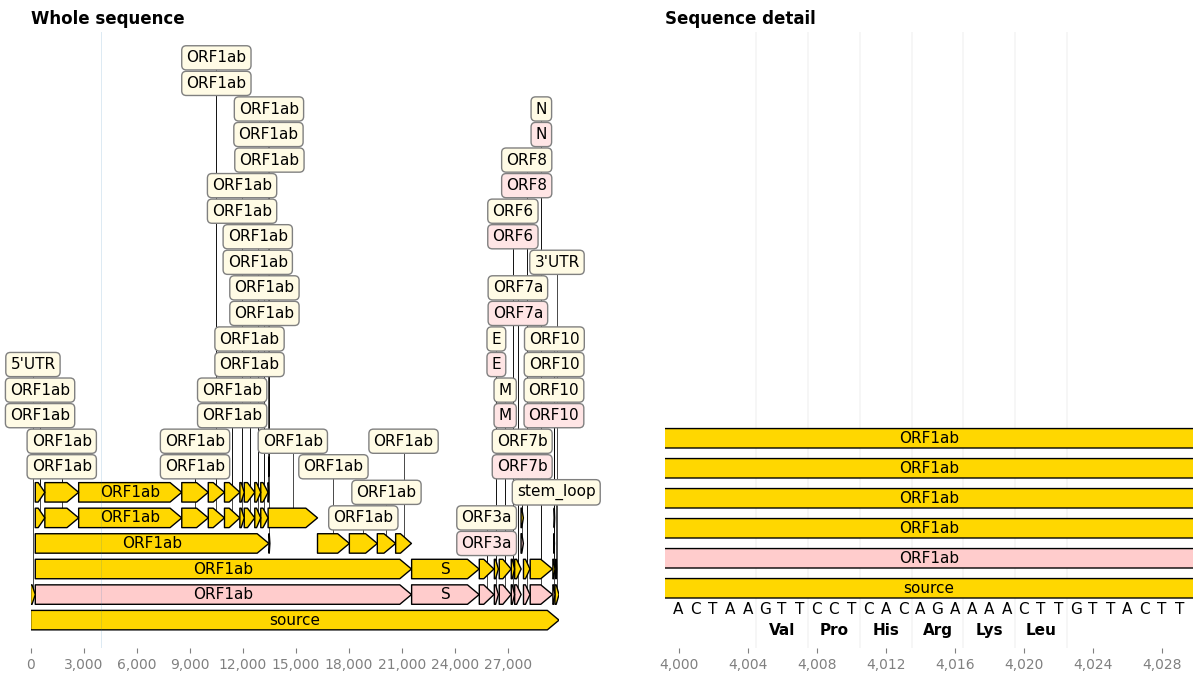

In [ ]:
from Bio import SeqIO
from dna_features_viewer import GraphicFeature, GraphicRecord
import matplotlib.pyplot as plt

# Step 1: Load the sequence and features from a GenBank (.gb) file
# color: #cffccc, #ccccff
genbank_file = "sequence.gb"  # Replace with your actual GenBank file

# Parse the GenBank file and extract the sequence record
seq_record = SeqIO.read(genbank_file, "genbank")

# Step 2: Extract sequence and features for GraphicRecord
features = []
for feature in seq_record.features:
    if feature.type in ["CDS", "gene","mat_peptide", "stem_loop", "source", "3'UTR", "5'UTR"]:  # Only plot genes or coding sequences
        start = feature.location.start
        end = feature.location.end
        strand = +1 if feature.location.strand == 1 else -1
        color = "#ffcccc" if feature.type == "gene" else "#ffd700"  # Customize colors
        label = feature.qualifiers.get("gene", [""])[0] if "gene" in feature.qualifiers else feature.type

        # Create GraphicFeature for each feature
        graphic_feature = GraphicFeature(start=start, end=end, strand=strand, color=color, label=label)
        features.append(graphic_feature)

# Create GraphicRecord for the whole sequence
record = GraphicRecord(sequence=str(seq_record.seq), features=features)

# Step 3: Define zoom region (customize this based on the region of interest)
zoom_start, zoom_end = 4000, 4030  # Adjust these coordinates to zoom into the desired region
cropped_record = record.crop((zoom_start, zoom_end))

# Step 4: Create a 2-panel figure (left: whole sequence, right: zoomed detail)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# PLOT THE WHOLE SEQUENCE (Left panel)
ax1.set_title("Whole sequence", loc='left', weight='bold')
record.plot(ax=ax1)
ax1.fill_between((zoom_start, zoom_end), +1000, -1000, alpha=0.15)  # Highlight zoomed region

# PLOT THE SEQUENCE DETAILS (Right panel)
cropped_record.plot_translation(ax=ax2, location=(zoom_start+5, zoom_end-5),
                                fontdict={'weight': 'bold'})
cropped_record.plot(ax=ax2, plot_sequence=True)
ax2.set_title("Sequence detail", loc='left', weight='bold')

# Step 5: Save the figure to a file
fig.savefig('overview_and_detail_from_genbank.png', bbox_inches='tight')

# Display the plot (optional)
plt.show()

Text(0, 0.5, 'GC(%)')

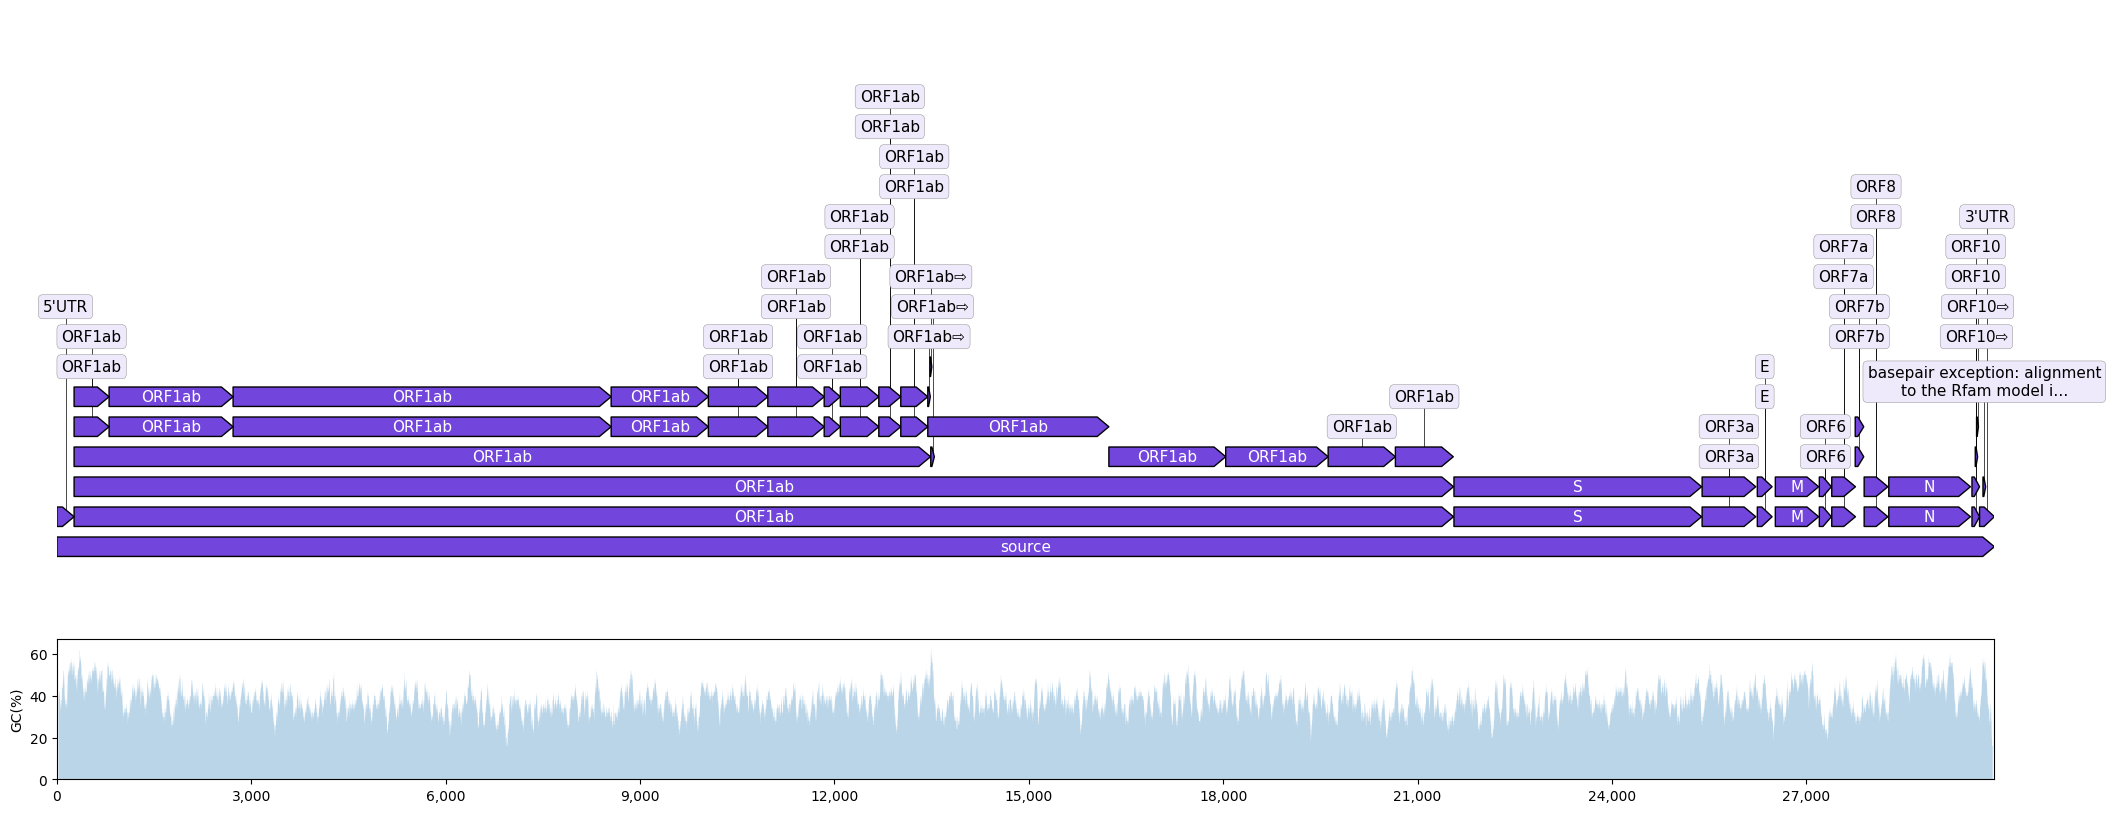

In [ ]:
import matplotlib.pyplot as plt
from dna_features_viewer import BiopythonTranslator
from Bio import SeqIO
import numpy as np

fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(25, 10), sharex=True, gridspec_kw={"height_ratios": [4, 1]}
)

# PLOT THE RECORD MAP
record = SeqIO.read("sequence.gb", "genbank")
graphic_record = BiopythonTranslator().translate_record(record)
graphic_record.plot(ax=ax1, with_ruler=False, strand_in_label_threshold=4)

# PLOT THE LOCAL GC CONTENT (we use 50bp windows)
gc = lambda s: 100.0 * len([c for c in s if c in "GC"]) / 50
xx = np.arange(len(record.seq) - 50)
yy = [gc(record.seq[x : x + 50]) for x in xx]
ax2.fill_between(xx + 25, yy, alpha=0.3)
ax2.set_ylim(bottom=0)
ax2.set_ylabel("GC(%)")

The figure above shows the ORFs in the Covid-19 genome, mainly: **ORF1ab, ORF3a, E, M, S and N**

The identification of coding sequences (CDS) is an important step in the functional annotation of genes. CDS is a sequence of nucleotides that corresponds with the sequence of amino acids in a protein. A typical CDS starts with ATG and ends with a stop codon.

The code below highlights the coding regions CDS in **blue**.

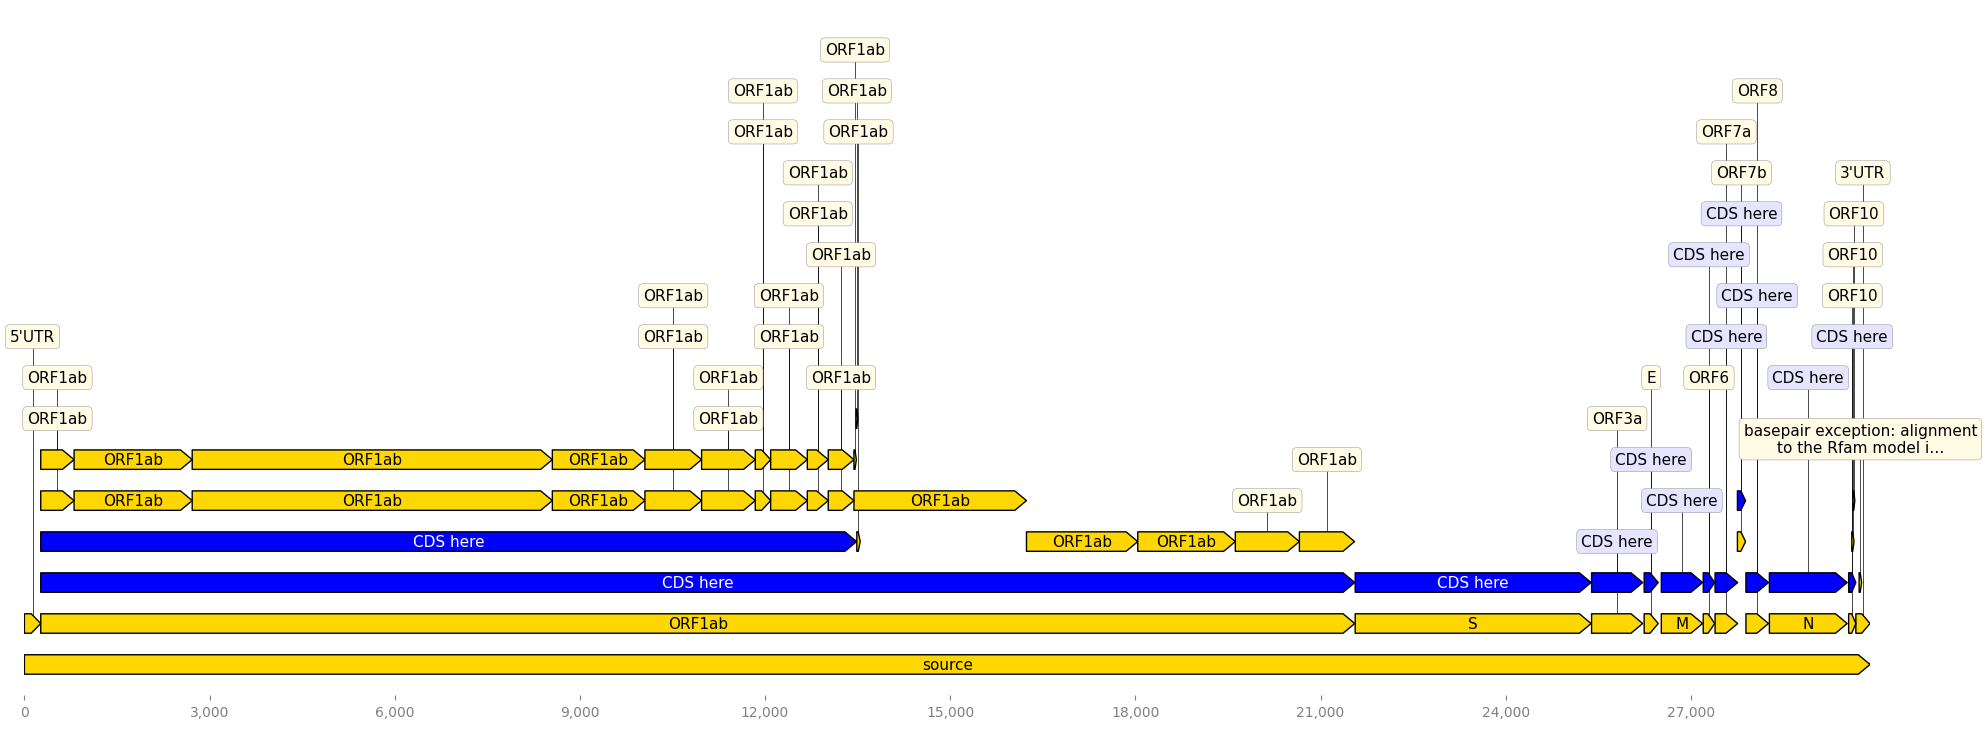

In [ ]:
from dna_features_viewer import BiopythonTranslator

class MyCustomTranslator(BiopythonTranslator):
    """Custom translator implementing the following theme:

    - Color terminators in green, CDS in blue, all other features in gold.
    - Do not display features that are restriction sites unless they are BamHI
    - Do not display labels for restriction sites
    - For CDS labels just write "CDS here" instead of the name of the gene.

    """

    def compute_feature_color(self, feature):
        if feature.type == "CDS":
            return "blue"
        elif feature.type == "terminator":
            return "green"
        else:
            return "gold"

    def compute_feature_label(self, feature):
        if feature.type == 'restriction_site':
            return None
        elif feature.type == "CDS":
            return "CDS here"
        else:
            return BiopythonTranslator.compute_feature_label(self, feature)

    def compute_filtered_features(self, features):
        """Do not display promoters. Just because."""
        return [
            feature for feature in features
            if (feature.type != "restriction_site")
            or ("BamHI" in str(feature.qualifiers.get("label", '')))
        ]


graphic_record = MyCustomTranslator().translate_record("sequence.gb")
ax, _ = graphic_record.plot(figure_width=20)
ax.figure.tight_layout()
ax.figure.savefig("custom_bopython_translator.png")

The figure above highlights in red the coding regions CDS in the Covid-19 genome. The main CDS are among the ORFs already found in the previous section, which include the ORF1ab, ORF3a, S protein, M protein and N protein. Let's dig in more and try to find out more information about those ORFs, their coding regions and the functionality of their coding proteins.

In [ ]:
record = SeqIO.read("sequence.gb", "genbank")

In [ ]:
table=11
min_pro_len=200
def find_orfs_with_trans(seq, trans_table, min_protein_length):
    answer = []
    seq_len = len(seq)
    for strand, nuc in [(+1, seq), (-1, seq.reverse_complement())]:
        for frame in range(3):
            trans = str(nuc[frame:].translate(trans_table))
            trans_len = len(trans)
            aa_start = 0
            aa_end = 0
            while aa_start < trans_len:
                aa_end = trans.find("*", aa_start)
                if aa_end == -1:
                    aa_end = trans_len
                if aa_end - aa_start >= min_protein_length:
                    if strand == 1:
                        start = frame + aa_start * 3
                        end = min(seq_len, frame + aa_end * 3 + 3)
                    else:
                        start = seq_len - frame - aa_end * 3 - 3
                        end = seq_len - frame - aa_start * 3
                    answer.append((start, end, strand, trans[aa_start:aa_end]))
                aa_start = aa_end + 1
    answer.sort()
    return answer

In [ ]:
orf_list = find_orfs_with_trans(record.seq, table, min_pro_len)
for start, end, strand, pro in orf_list:
    print(
        "%s...%s - length %i, strand %i, %i:%i"
        % (pro[:30], pro[-3:], len(pro), strand, start, end))

PKGKMESLVPGFNEKTHVQLSLPVLQVRDV...FAV - length 4409, strand 1, 253:13483
CTIVFKRVCGVSAARLTPCGTGTSTDVVYR...VNN - length 2701, strand 1, 13449:21555
LEKTTELLFLVMFLLTTKRTMFVFLVLLPL...HYT - length 1293, strand 1, 21502:25384
ASAQRSQITLHINELMDLFMRIFTIGTVTL...VPL - length 290, strand 1, 25347:26220
SSGLNELNIILVFLFGTLILAMADSNGTIT...LVQ - length 243, strand 1, 26459:27191
RSCCFRFHLNEQTKMSDNGPQNQRNAPRIT...TQA - length 433, strand 1, 28231:29533


/usr/local/lib/python3.10/dist-packages/Bio/Seq.py:2879: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


The Covid-19 genome has **6 ORFs** with more than **200 amino acids**. We run a BLAST search to find out what proteins do those sequences code for.

In [ ]:
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.Seq import Seq
import pandas as pd
import time  # To avoid overwhelming the server with requests

# Step 1: Define multiple protein sequences (translated from nucleotide)
seq=[]
for  start, end, strand, pro in orf_list:
    seq.append(pro)

# Step 2: Perform PSI-BLAST on each translated sequence and collect results
blast_results = []

for i, protein_seq in enumerate(seq, start=1):
    print(f"Running PSI-BLAST for Sequence {i}...")

    # Translate the sequence to protein
    #protein_seq = seq.translate()

    # Perform PSI-BLAST (online) using NCBIWWW.qblast
    result_handle = NCBIWWW.qblast("blastp", "nr", protein_seq)

    # Parse the result
    blast_records = NCBIXML.parse(result_handle)

    # Extract relevant information and append it to the result list
    for blast_record in blast_records:
        for alignment in blast_record.alignments:
            for hsp in alignment.hsps:
                if hsp.expect < 0.01:  # Filter by E-value
                    result = {
                        "Sequence Number": f"Sequence {i}",
                        "Subject Title": alignment.title,
                        "Alignment Length": alignment.length,
                        "E-value": hsp.expect,
                        "Query Start": hsp.query_start,
                        "Query End": hsp.query_end,
                        "Subject Start": hsp.sbjct_start,
                        "Subject End": hsp.sbjct_end,
                        "Query Sequence": hsp.query,
                        "Match Sequence": hsp.match,
                        "Subject Sequence": hsp.sbjct
                    }
                    blast_results.append(result)

    # Close the result handle
    result_handle.close()

    # Add a delay between requests to avoid overwhelming the NCBI server
    time.sleep(5)

# Step 3: Save the results in a pandas DataFrame
df = pd.DataFrame(blast_results)

# Step 4: Save DataFrame to a CSV file
df.to_csv("psi_blast_orf_results.csv", index=False)

print("PSI-BLAST results saved to 'psi_blast_orf_results.csv'")

Running PSI-BLAST for Sequence 1...
Running PSI-BLAST for Sequence 2...
Running PSI-BLAST for Sequence 3...
Running PSI-BLAST for Sequence 4...
Running PSI-BLAST for Sequence 5...
Running PSI-BLAST for Sequence 6...
PSI-BLAST results saved to 'psi_blast_orf_results.csv'


In [ ]:
# Load the metadata (assuming you have a CSV file)
psi_blast_file = "psi_blast_orf_results.csv"
psi_blast_csv = pd.read_csv(psi_blast_file)
psi_blast_orf = pd.DataFrame(psi_blast_csv)
psi_blast_orf

,Sequence Number,Subject Title,Alignment Length,E-value,Query Start,Query End,Subject Start,Subject End,Query Sequence,Match Sequence,Subject Sequence
0,Sequence 1,ref|YP_009725295.1| ORF1a polyprotein [Severe ...,4405,0.0,5,4409,1,4405,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...
1,Sequence 1,gb|QWC81719.1| ORF1a polyprotein [Severe acute...,4405,0.0,5,4409,1,4405,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...
2,Sequence 1,gb|WZB31989.1| ORF1a polyprotein [Severe acute...,4405,0.0,5,4409,1,4405,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...
3,Sequence 1,gb|QRW80956.1| ORF1a polyprotein [Severe acute...,4405,0.0,5,4409,1,4405,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...
4,Sequence 1,gb|WPW11758.1| ORF1a polyprotein [Severe acute...,4405,0.0,5,4409,1,4405,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...
...,...,...,...,...,...,...,...,...,...,...,...
295,Sequence 6,gb|QJX69490.1| nucleocapsid phosphoprotein [Se...,419,0.0,15,433,1,419,MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLP...,MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLP...,MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLP...
296,Sequence 6,gb|UHE10300.1| nucleocapsid phosphoprotein [Se...,419,0.0,15,433,1,419,MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLP...,MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLP...,MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLP...
297,Sequence 6,gb|QNA39423.1| nucleocapsid phosphoprotein [Se...,419,0.0,15,433,1,419,MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLP...,MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLP...,MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLP...
298,Sequence 6,gb|WKJ48376.1| nucleocapsid phosphoprotein [Se...,419,0.0,15,433,1,419,MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLP...,MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLP...,MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLP...


In [ ]:
seq=[]
for  start, end, strand, pro in orf_list:
    seq.append(pro)
spike = seq[2]
spike

'LEKTTELLFLVMFLLTTKRTMFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLND

In [ ]:
#Calculate amino acids frequency
def char_frequency(str1):
    dict = {}
    for n in str1:
        keys = dict.keys()
        if n in keys:
            dict[n] += 1
        else:
            dict[n] = 1
    return dict
print(char_frequency(spike))
amino_acids=char_frequency(spike)

#Get amino acids dataset
aas= pd.DataFrame(data=amino_acids, index=[0]).T.reset_index()
aas= aas.rename(columns={0: 'frequency', 'index': 'amino_acids'})
aas=aas.sort_values(by=['frequency'], ascending=True)

{'L': 114, 'E': 50, 'K': 63, 'T': 102, 'F': 79, 'V': 98, 'M': 15, 'R': 43, 'P': 58, 'S': 99, 'Q': 62, 'C': 40, 'N': 88, 'A': 79, 'Y': 54, 'G': 82, 'D': 62, 'H': 17, 'W': 12, 'I': 76}


<ipython-input-26-f791181198db>:25: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Frequency')


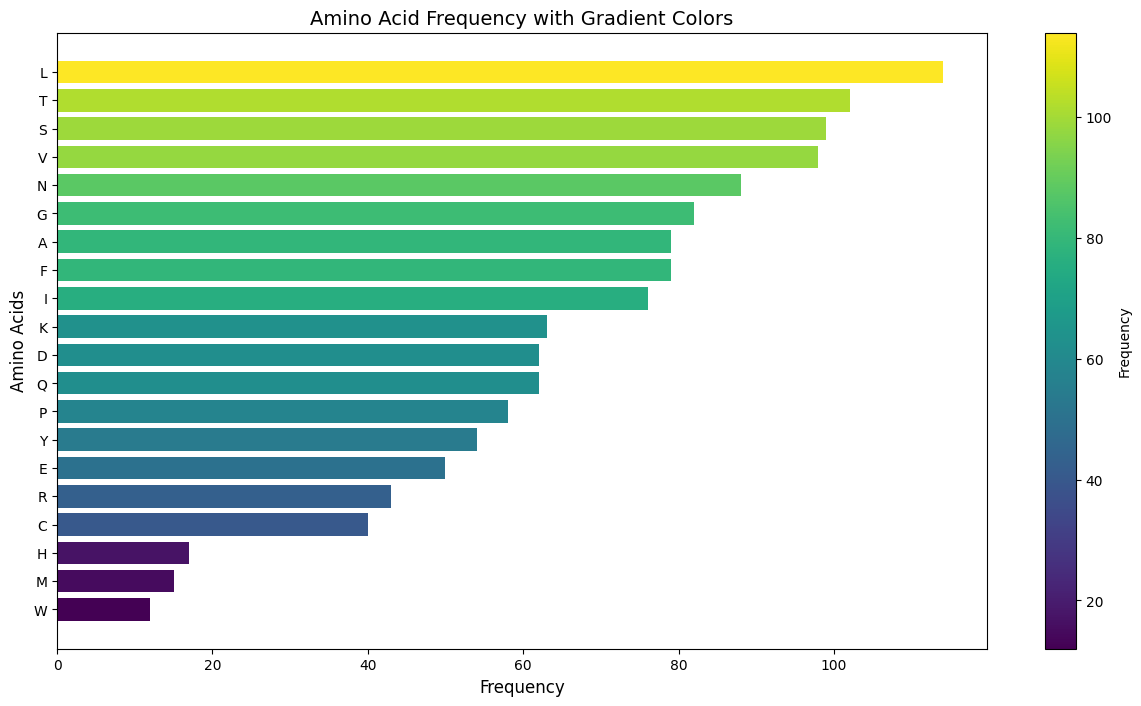

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have already created the `aas` DataFrame as described
# Example data
#amino_acids = {'A': 5, 'C': 7, 'D': 2, 'E': 8, 'F': 4}  # Replace with your actual data
#aas1 = pd.DataFrame(data=amino_acids, index=[0]).T.reset_index()
#aas1 = aas1.rename(columns={0: 'frequency', 'index': 'amino_acids'})
#aas1 = aas1.sort_values(by=['frequency'], ascending=True)

# Normalize the frequency values to [0, 1] for gradient mapping
norm = plt.Normalize(vmin=aas['frequency'].min(), vmax=aas['frequency'].max())
colors = plt.cm.viridis(norm(aas['frequency']))  # Using the 'viridis' colormap for the gradient

# Create the bar chart
plt.figure(figsize=(15, 8))

# Plot horizontal bar chart with gradient color
plt.barh(aas['amino_acids'], aas['frequency'], color=colors)

# Add color bar (optional)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  # Only needed for adding a color bar
plt.colorbar(sm, label='Frequency')

# Add titles and labels
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Amino Acids', fontsize=12)
plt.title('Amino Acid Frequency with Gradient Colors', fontsize=14)

# Display the plot
plt.show()